# Proyecto Data Science - Primer Entrega

## DataSet: Credit Card Approvals 

### Contexto comercial

Las tarjetas de calificación crediticia son un método de control de riesgos habitual en el sector financiero. Utiliza la información personal y los datos presentados por los solicitantes de tarjetas de crédito para predecir la probabilidad de futuros impagos y préstamos de tarjetas de crédito. El banco puede decidir si emite una tarjeta de crédito al solicitante. Las puntuaciones de crédito pueden cuantificar objetivamente la magnitud del riesgo.

### Descripción de la DataSet

ID:	Client number	
CODE_GENDER: Gender	

FLAG_OWN_CAR: Is there a car	

FLAG_OWN_REALTY: Is there a property	

CNT_CHILDREN: Number of children	

AMT_INCOME_TOTAL:	Annual income	

NAME_INCOME_TYPE:	Income category	

NAME_EDUCATION_TYPE:	Education level	

NAME_FAMILY_STATUS:	Marital status	

NAME_HOUSING_TYPE:	Way of living	

DAYS_BIRTH	Birthday:	Count backwards from current day (0), -1 means yesterday

DAYS_EMPLOYED:	Start date of employment	Count backwards from current day(0). If positive, it means the person currently unemployed.

FLAG_MOBIL:	Is there a mobile phone	

FLAG_WORK_PHONE:	Is there a work phone	

FLAG_PHONE:	Is there a phone	

FLAG_EMAIL:	Is there an email	

OCCUPATION_TYPE:	Occupation	

CNT_FAM_MEMBERS:	Family size

TOTAL_GOOD_DEBT: Total of 'Good Debt' Status

TOTAL_BAD_DEBT: Total of 'Bad Debt' Status

STATUS: Eligibility Final Status (1=Yes/Allowed; 0=No/Rejected)

#### Leemos y visualizamos la DataSet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling
from ydata_profiling import ProfileReport
from scipy.stats import chi2_contingency
import colorama
from colorama import Fore
from scipy.stats import iqr
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import sys
import joblib
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder
import warnings, gc, joblib
warnings.filterwarnings('ignore')
from scipy.stats import probplot
from matplotlib.ticker import MultipleLocator

In [2]:
df=pd.read_csv(r'/home/anakin/Documents/CursoDataScience/candidatos2/Application_Data.csv')

In [3]:
df.head(26000)

Applicant_ID Applicant_Gender  Owned_Car  Owned_Realty  Total_Children  \
0           5008806          M                1             1               0   
1           5008808          F                0             1               0   
2           5008809          F                0             1               0   
3           5008810          F                0             1               0   
4           5008811          F                0             1               0   
...             ...              ...        ...           ...             ...   
25123       5150482          F                1             1               1   
25124       5150483          F                1             1               1   
25125       5150484          F                1             1               1   
25126       5150485          F                1             1               1   
25127       5150487          M                1             0               0   

       Total_Income                                        Income_Type  \
0            112500  Working                                       ...   
1            270000  Commercial associate                          ...   
2            270000  Commercial associate                          ...   
3            270000  Commercial associate                          ...   
4            270000  Commercial associate                          ...   
...             ...                                                ...   
25123        157500  Working                                       ...   
25124        157500  Working                                       ...   
25125        157500  Working                                       ...   
25126        157500  Working                                       ...   
25127        202500  Working                                       ...   

                                          Education_Type  \
0      Secondary / secondary special                 ...   
1      Secondary / secondary special                 ...   
2      Secondary / secondary special                 ...   
3      Secondary / secondary special                 ...   
4      Secondary / secondary special                 ...   
...                                                  ...   
25123  Secondary / secondary special                 ...   
25124  Secondary / secondary special                 ...   
25125  Secondary / secondary special                 ...   
25126  Secondary / secondary special                 ...   
25127  Secondary / secondary special                 ...   

                                           Family_Status  \
0      Married                                       ...   
1      Single / not married                          ...   
2      Single / not married                          ...   
3      Single / not married                          ...   
4      Single / not married                          ...   
...                                                  ...   
25123  Married                                       ...   
25124  Married                                       ...   
25125  Married                                       ...   
25126  Married                                       ...   
25127  Married                                       ...   

                                            Housing_Type  ...  \
0      House / apartment                             ...  ...   
1      House / apartment                             ...  ...   
2      House / apartment                             ...  ...   
3      House / apartment                             ...  ...   
4      House / apartment                             ...  ...   
...                                                  ...  ...   
25123  House / apartment                             ...  ...   
25124  House / apartment                             ...  ...   
25125  House / apartment                             ...  ...   
25126  House / apartment                             

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

### Hipotesis del proyecto

- Utilizar la DataSet para generar un algortimo de Machine Learning para predecir si un cliente es apto o no para recibir un crédito.

#### Generamos algunos gráficos y estadisticos para estudiar las variables de la DataSet y econtrar insights

In [5]:
df.describe().T

count          mean            std        min  \
Applicant_ID          25128.0  5.078835e+06   41943.777736  5008806.0   
Owned_Car             25128.0  4.183779e-01       0.493303        0.0   
Owned_Realty          25128.0  6.549268e-01       0.475402        0.0   
Total_Children        25128.0  5.094715e-01       0.762937        0.0   
Total_Income          25128.0  1.948365e+05  104521.123300    27000.0   
Owned_Mobile_Phone    25128.0  1.000000e+00       0.000000        1.0   
Owned_Work_Phone      25128.0  2.737584e-01       0.445895        0.0   
Owned_Phone           25128.0  2.927412e-01       0.455030        0.0   
Owned_Email           25128.0  1.006845e-01       0.300916        0.0   
Total_Family_Members  25128.0  2.291309e+00       0.928871        1.0   
Applicant_Age         25128.0  4.099550e+01       9.552832       21.0   
Years_of_Working      25128.0  7.690903e+00       6.415007        1.0   
Total_Bad_Debt        25128.0  3.330946e-01       1.569448        0.0   
Total_Good_Debt       25128.0  2.105755e+01      14.735347        1.0   
Status                25128.0  9.951847e-01       0.069227        0.0   

                             25%        50%         75%        max  
Applicant_ID          5042225.75  5079004.0  5115603.25  5150487.0  
Owned_Car                   0.00        0.0        1.00        1.0  
Owned_Realty                0.00        1.0        1.00        1.0  
Total_Children              0.00        0.0        1.00        5.0  
Total_Income           135000.00   180000.0   225000.00  1575000.0  
Owned_Mobile_Phone          1.00        1.0        1.00        1.0  
Owned_Work_Phone            0.00        0.0        1.00        1.0  
Owned_Phone                 0.00        0.0        1.00        1.0  
Owned_Email                 0.00        0.0        0.00        1.0  
Total_Family_Members        2.00        2.0        3.00        7.0  
Applicant_Age              33.00       40.0       48.00       68.0  
Years_of_Working            3.00        6.0       10.00       44.0  
Total_Bad_Debt              0.00        0.0        0.00       49.0  
Total_Good_Debt             9.00       18.0       31.00       61.0  
Status                      1.00        1.0        1.00        1.0

In [6]:
df.isnull().sum()

Applicant_ID            0
Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Mobile_Phone      0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
Total_Bad_Debt          0
Total_Good_Debt         0
Status                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df=df.drop(['Owned_Mobile_Phone', 'Owned_Phone', 'Applicant_ID'], 1)

### Exploratory Data Analysis

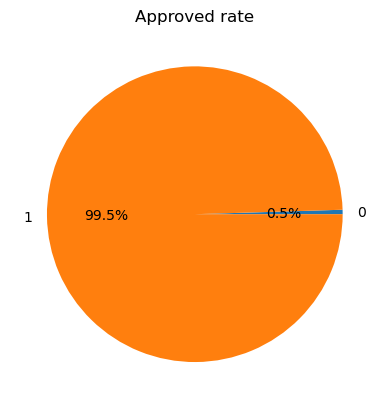

In [9]:
pie_x, pie_y = np.unique(df['Status'], return_counts=True)
plt.pie(pie_y, labels=pie_x, autopct = '%1.1f%%') 
plt.title('Approved rate')
plt.show()

Skewness of Owned_Car: 0.3309472983422363
Kurtosis of Owned_Car: -1.8906243715503783


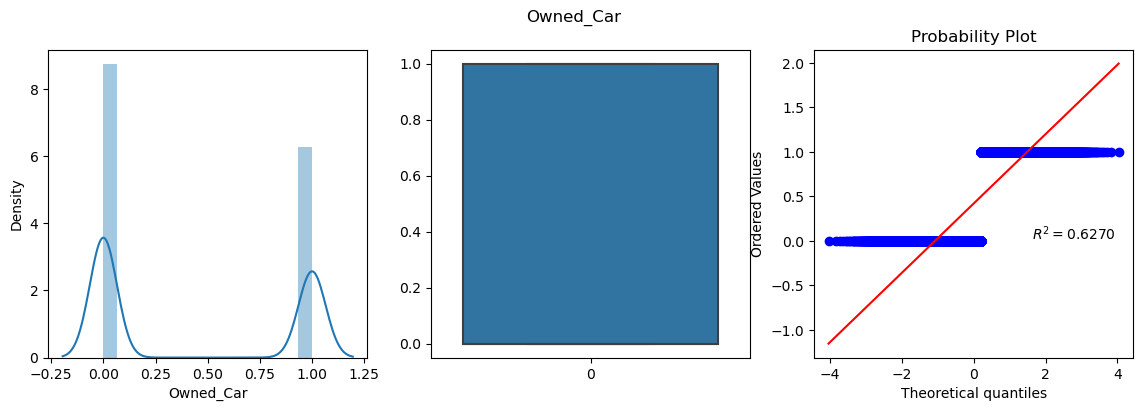

Skewness of Owned_Realty: -0.6518240762415578
Kurtosis of Owned_Realty: -1.5752507580921022


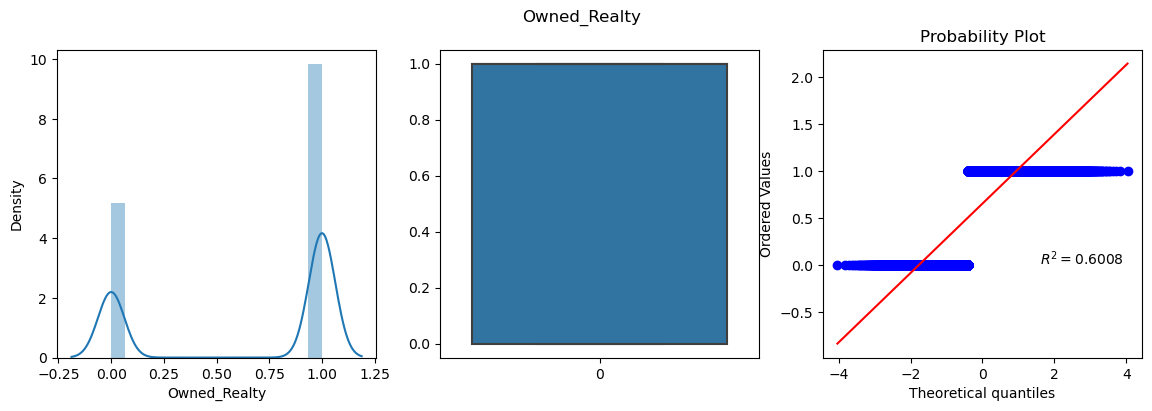

Skewness of Total_Children: 1.4772750155469205
Kurtosis of Total_Children: 2.0061118025602385


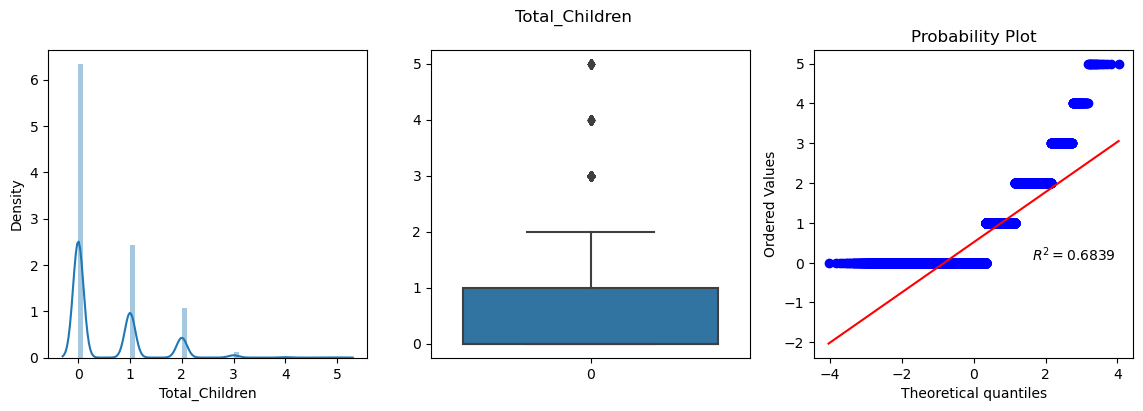

Skewness of Total_Income: 2.964037810898012
Kurtosis of Total_Income: 20.45120363499683


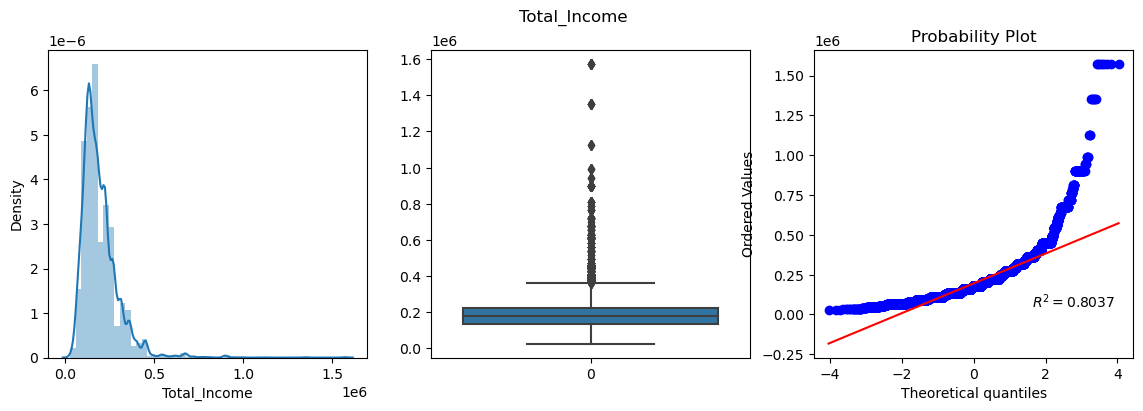

Skewness of Owned_Work_Phone: 1.0148554784818
Kurtosis of Owned_Work_Phone: -0.9701455804299215


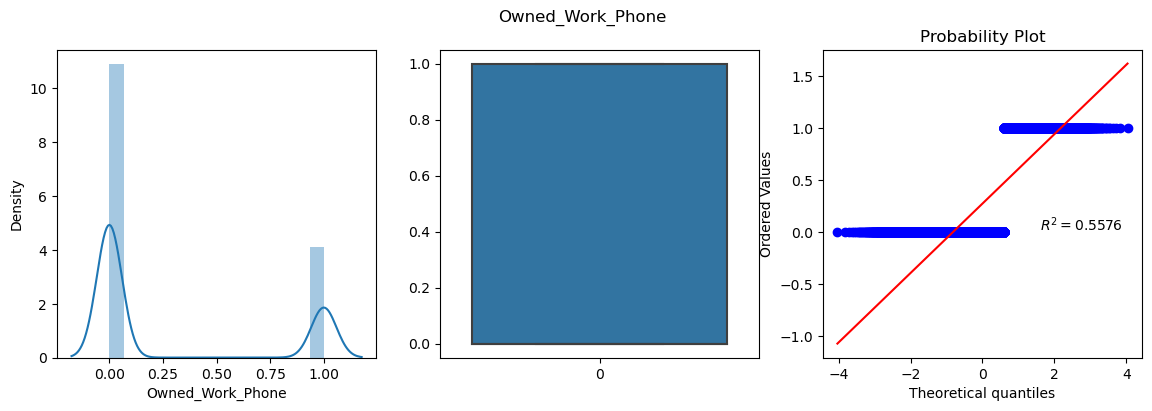

Skewness of Owned_Email: 2.6542067893840953
Kurtosis of Owned_Email: 5.045215235704062


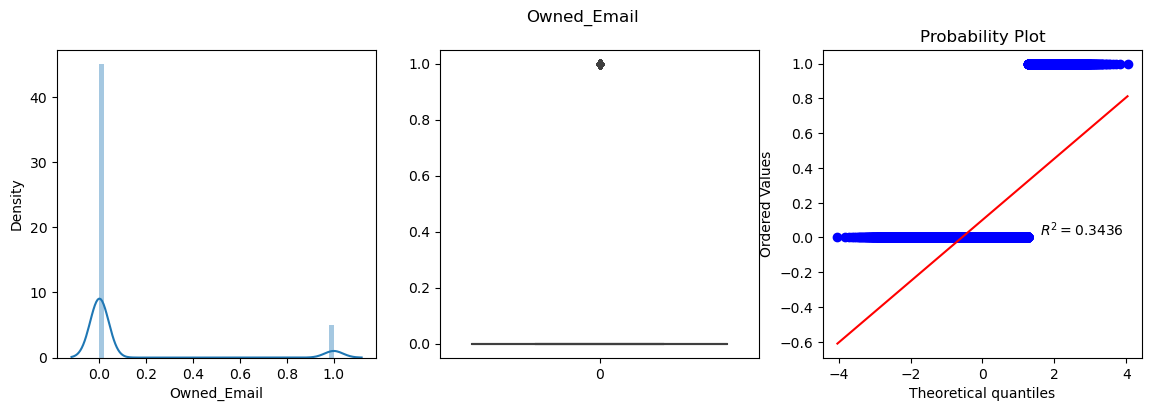

Skewness of Total_Family_Members: 0.7844887442337911
Kurtosis of Total_Family_Members: 0.75574803569299


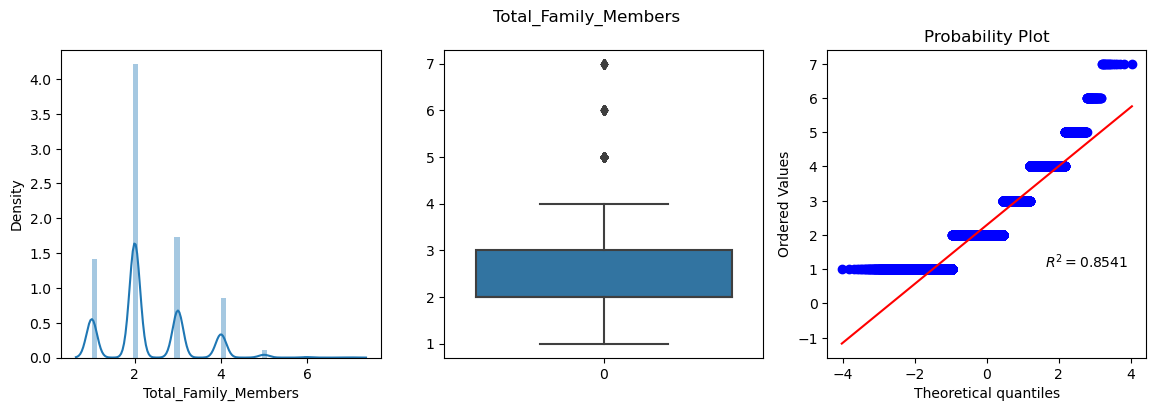

Skewness of Applicant_Age: 0.27145447040373916
Kurtosis of Applicant_Age: -0.7488972324886034


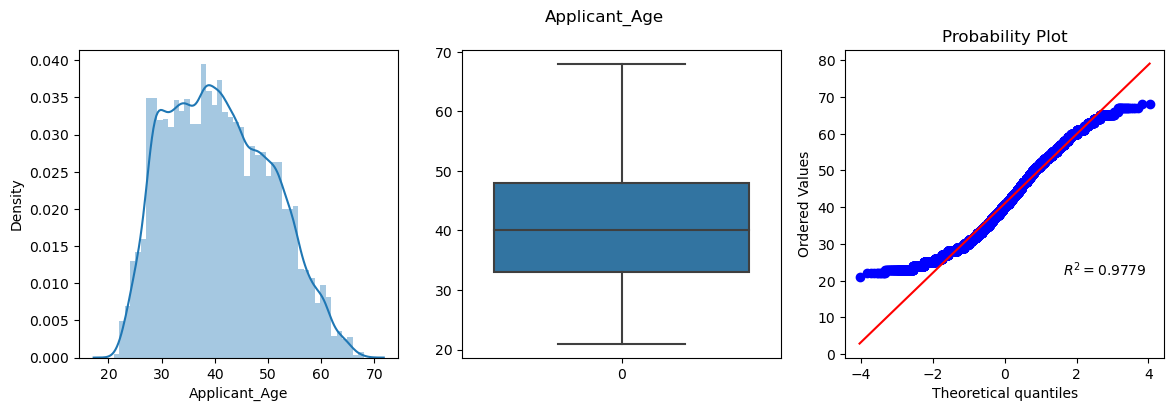

Skewness of Years_of_Working: 1.7242349362023368
Kurtosis of Years_of_Working: 3.580535822965504


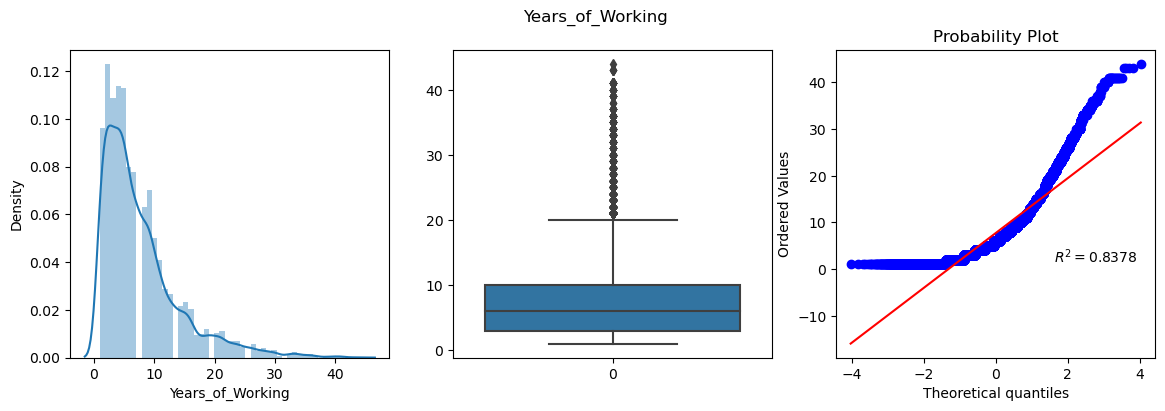

Skewness of Total_Bad_Debt: 12.432799215282186
Kurtosis of Total_Bad_Debt: 250.21761745884922


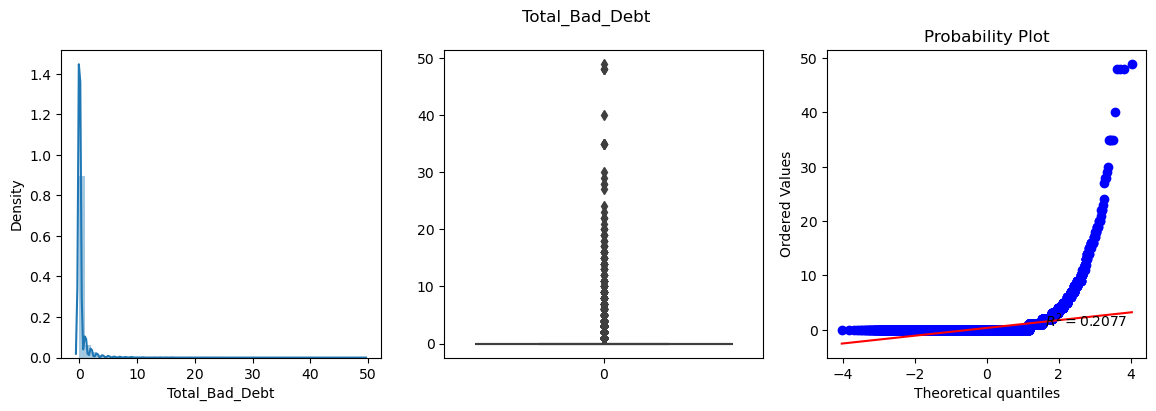

Skewness of Total_Good_Debt: 0.7382906800171972
Kurtosis of Total_Good_Debt: -0.3519465062784275


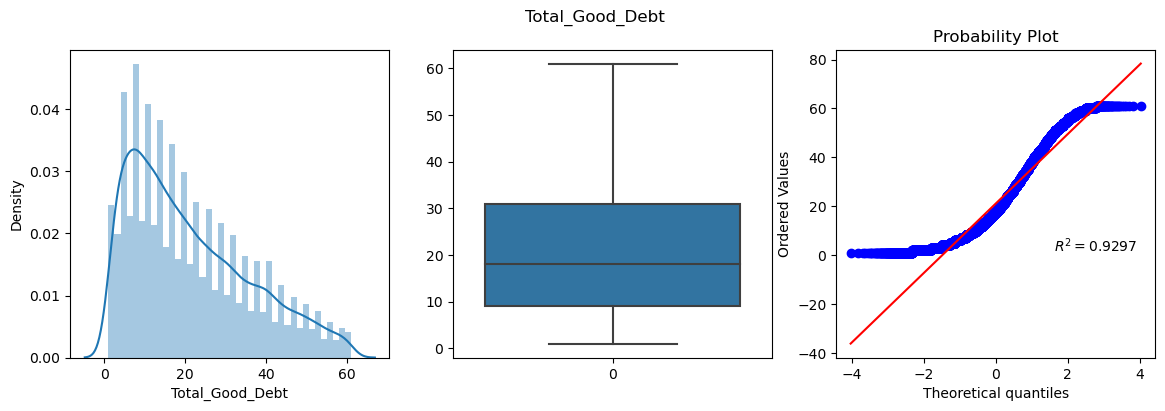

Skewness of Status: -14.307295290381374
Kurtosis of Status: 202.71483309749533


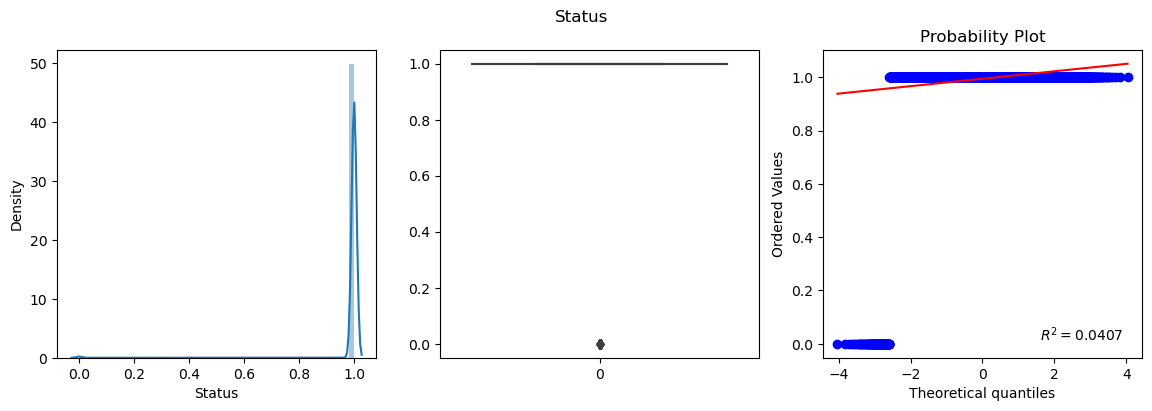

In [10]:
for col in df.select_dtypes(np.number).columns:
    print(f"Skewness of {col}:",df[col].skew())
    print(f"Kurtosis of {col}:",df[col].kurtosis())
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(df[col])
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    probplot(df[col],rvalue=True,plot=plt,dist='norm')
    plt.suptitle(col)
    plt.show()
    gc.collect()

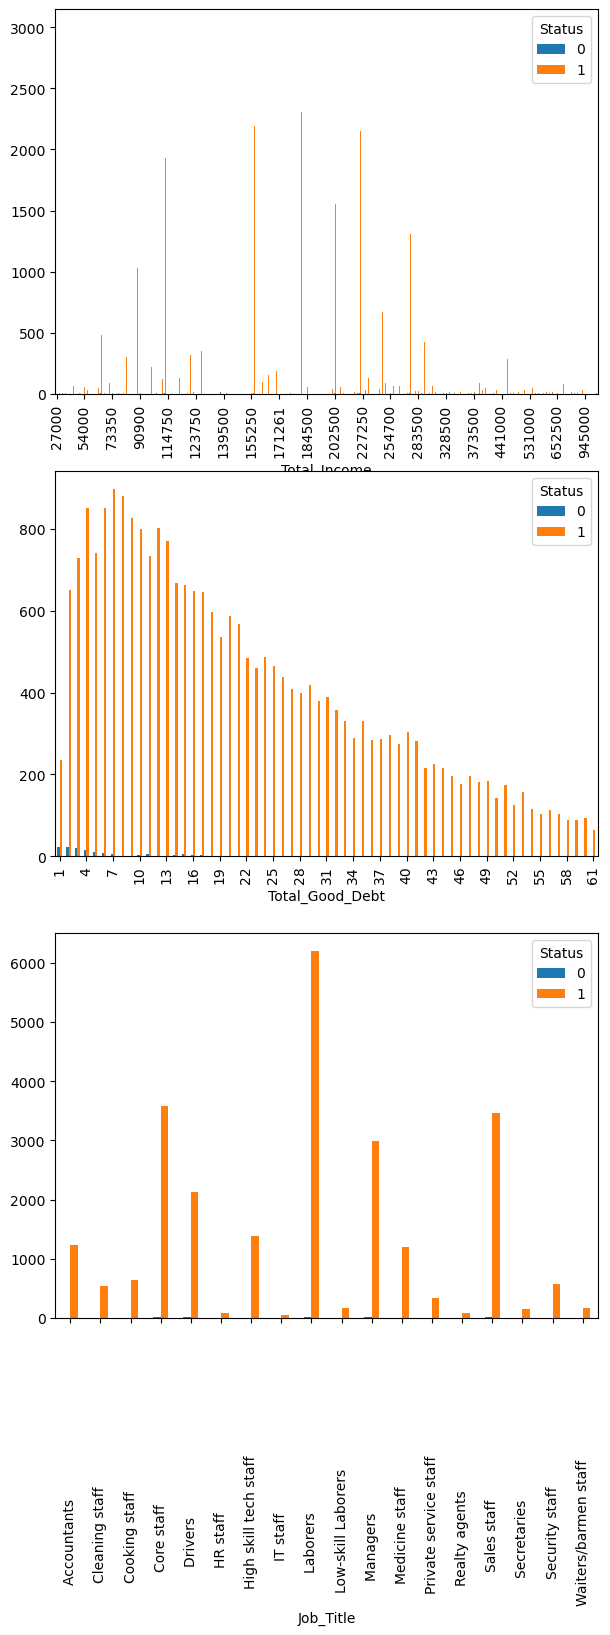

In [11]:
fig, ax = plt.subplots(3,1 , figsize=(7, 17))
a = df.groupby(['Total_Income', 'Status'])['Status'].count().unstack('Status')
b = df.groupby(['Total_Good_Debt', 'Status'])['Status'].count().unstack('Status')
c = df.groupby(['Job_Title', 'Status'])['Status'].count().unstack('Status')
a.plot(kind='bar', ax=ax[0])
b.plot(kind='bar', ax=ax[1])
c.plot(kind='bar', ax=ax[2])
ax[0].xaxis.set_major_locator(MultipleLocator(10))
ax[1].xaxis.set_major_locator(MultipleLocator(3))
plt.show()

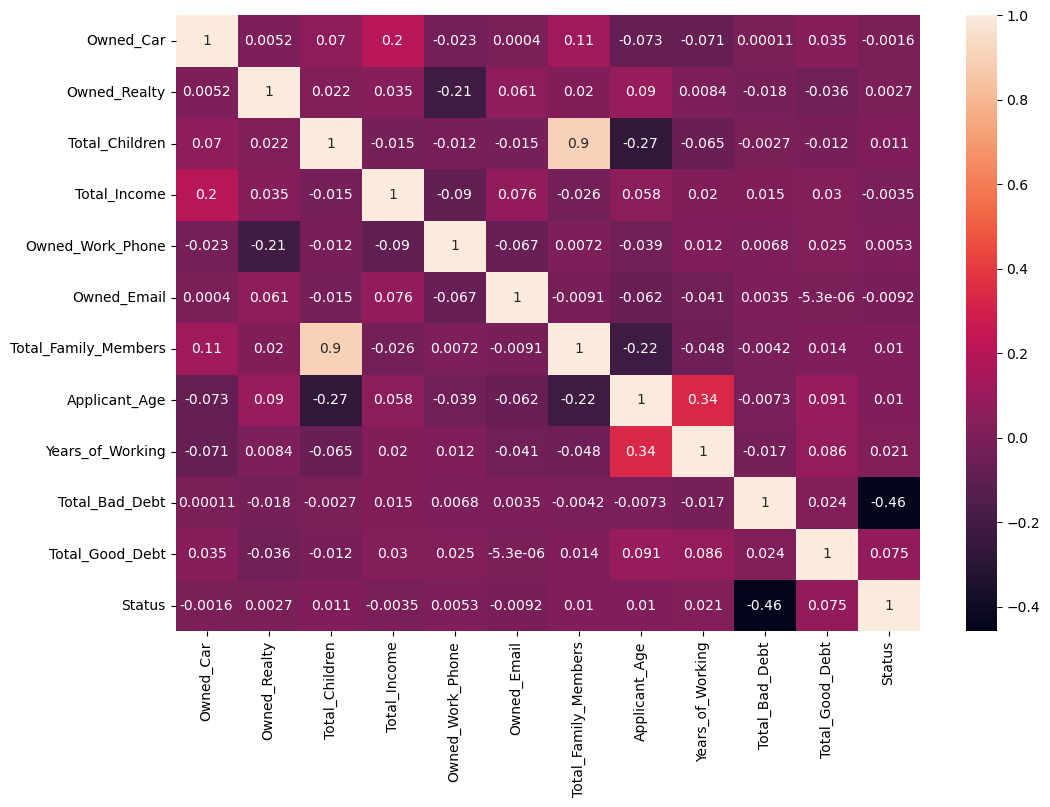

In [12]:
num_col = df.select_dtypes(exclude = object)
plt.figure(figsize=(12,8))
sns.heatmap(num_col.corr(), annot=True)
plt.show()

In [13]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
df.select_dtypes(object).columns

Index(['Applicant_Gender', 'Income_Type', 'Education_Type', 'Family_Status',
       'Housing_Type', 'Job_Title'],
      dtype='object')

In [15]:
df.Applicant_Gender.value_counts()

F          15627
M           9501
Name: Applicant_Gender, dtype: int64

In [16]:
df.Income_Type.value_counts()

Working                                               15616
Commercial associate                                   7052
State servant                                          2437
Pensioner                                                13
Student                                                  10
Name: Income_Type, dtype: int64

In [17]:
df.Education_Type.value_counts()

Secondary / secondary special                         16802
Higher education                                       7132
Incomplete higher                                       993
Lower secondary                                         187
Academic degree                                          14
Name: Education_Type, dtype: int64

In [18]:
df.Family_Status.value_counts()

Married                                               17507
Single / not married                                   3444
Civil marriage                                         2133
Separated                                              1464
Widow                                                   580
Name: Family_Status, dtype: int64

In [19]:
df.Housing_Type.value_counts()

House / apartment                                     22096
With parents                                           1430
Municipal apartment                                     812
Rented apartment                                        439
Office apartment                                        199
Co-op apartment                                         152
Name: Housing_Type, dtype: int64

In [20]:
df.Job_Title.value_counts()

Laborers                                              6211
Core staff                                            3591
Sales staff                                           3485
Managers                                              3012
Drivers                                               2135
High skill tech staff                                 1383
Accountants                                           1241
Medicine staff                                        1207
Cooking staff                                          655
Security staff                                         592
Cleaning staff                                         549
Private service staff                                  344
Low-skill Laborers                                     175
Waiters/barmen staff                                   173
Secretaries                                            151
HR staff                                                85
Realty agents                                           

In [21]:
# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[["M      ", 'F      ']])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(df[["Applicant_Gender"]])
df["Applicant_Gender-encoded"] = encoder.transform(df[["Applicant_Gender"]])

In [22]:
df[["Applicant_Gender", "Applicant_Gender-encoded"]].head(5)

Applicant_Gender  Applicant_Gender-encoded
0          M                             0.0
1          F                             1.0
2          F                             1.0
3          F                             1.0
4          F                             1.0

In [23]:
#Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[['Working                                           ',
                                      'Commercial associate                              ',
                                      'State servant                                     ',
                                      'Pensioner                                         ',
                                      'Student                                           ']])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(df[["Income_Type"]])
df["Income_Type-encoded"] = encoder.transform(df[["Income_Type"]])

In [24]:
df[["Income_Type", "Income_Type-encoded"]].head(5)

Income_Type  Income_Type-encoded
0  Working                                       ...                  0.0
1  Commercial associate                          ...                  1.0
2  Commercial associate                          ...                  1.0
3  Commercial associate                          ...                  1.0
4  Commercial associate                          ...                  1.0

In [25]:
#Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[['Secondary / secondary special                     ',
                                      'Higher education                                  ',
                                      'Incomplete higher                                 ',
                                      'Lower secondary                                   ',
                                      'Academic degree                                   ']])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(df[["Education_Type"]])
df["Education_Type-encoded"] = encoder.transform(df[["Education_Type"]])

In [26]:
df[["Education_Type", "Education_Type-encoded"]].head(5)

Education_Type  Education_Type-encoded
0  Secondary / secondary special                 ...                     0.0
1  Secondary / secondary special                 ...                     0.0
2  Secondary / secondary special                 ...                     0.0
3  Secondary / secondary special                 ...                     0.0
4  Secondary / secondary special                 ...                     0.0

In [27]:
#Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[['Married                                           ',
                                      'Single / not married                              ',
                                      'Civil marriage                                    ',
                                      'Separated                                         ',
                                      'Widow                                             ']])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(df[["Family_Status"]])
df["Family_Status-encoded"] = encoder.transform(df[["Family_Status"]])

In [28]:
df[["Family_Status", "Family_Status-encoded"]].head(5)

Family_Status  Family_Status-encoded
0  Married                                       ...                    0.0
1  Single / not married                          ...                    1.0
2  Single / not married                          ...                    1.0
3  Single / not married                          ...                    1.0
4  Single / not married                          ...                    1.0

In [29]:
#Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[['House / apartment                                 ',
                                      'With parents                                      ',
                                      'Municipal apartment                               ',
                                      'Rented apartment                                  ',
                                      'Office apartment                                  ',
                                      'Co-op apartment                                   ']])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(df[["Housing_Type"]])
df["Housing_Type-encoded"] = encoder.transform(df[["Housing_Type"]])

In [30]:
df[["Housing_Type", "Housing_Type-encoded"]].head(5)

Housing_Type  Housing_Type-encoded
0  House / apartment                             ...                   0.0
1  House / apartment                             ...                   0.0
2  House / apartment                             ...                   0.0
3  House / apartment                             ...                   0.0
4  House / apartment                             ...                   0.0

In [31]:
#Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[['Security staff                                    ',
                                      'Core staff                                        ',
                                      'Cooking staff                                     ',
                                      'Accountants                                       ',
                                      'High skill tech staff                             ',
                                      'Realty agents                                     ',
                                      'Laborers                                          ',
                                      'Sales staff                                       ',
                                      'Managers                                          ',
                                      'Drivers                                           ',
                                      'Secretaries                                       ',
                                      'Waiters/barmen staff                              ',
                                      'HR staff                                          ',
                                      'Private service staff                             ',
                                      'Low-skill Laborers                                ',
                                      'Medicine staff                                    ',
                                      'IT staff                                          ',
                                      'Cleaning staff                                    ']])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(df[["Job_Title"]])
df["Job_Title-encoded"] = encoder.transform(df[["Job_Title"]])

In [32]:
df[["Job_Title", "Job_Title-encoded"]].head(5)

Job_Title  Job_Title-encoded
0  Security staff                                ...                0.0
1  Sales staff                                   ...                7.0
2  Sales staff                                   ...                7.0
3  Sales staff                                   ...                7.0
4  Sales staff                                   ...                7.0

In [33]:
df =df.drop(['Applicant_Gender','Income_Type','Education_Type','Family_Status','Housing_Type','Job_Title'],1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Owned_Car                 25128 non-null  int64  
 1   Owned_Realty              25128 non-null  int64  
 2   Total_Children            25128 non-null  int64  
 3   Total_Income              25128 non-null  int64  
 4   Owned_Work_Phone          25128 non-null  int64  
 5   Owned_Email               25128 non-null  int64  
 6   Total_Family_Members      25128 non-null  int64  
 7   Applicant_Age             25128 non-null  int64  
 8   Years_of_Working          25128 non-null  int64  
 9   Total_Bad_Debt            25128 non-null  int64  
 10  Total_Good_Debt           25128 non-null  int64  
 11  Status                    25128 non-null  int64  
 12  Applicant_Gender-encoded  25128 non-null  float64
 13  Income_Type-encoded       25128 non-null  float64
 14  Educat

#### Utilizamos un test $\chi^2$ y calculamos los diferentes p_values utilizando una significancia del 5%

In [35]:
category=['Applicant_Gender-encoded', 'Owned_Car', 'Owned_Realty', 'Total_Children', 'Income_Type-encoded', 'Education_Type-encoded', 'Family_Status-encoded', 'Housing_Type-encoded', 'Owned_Work_Phone', 'Owned_Email', 'Job_Title-encoded', 'Total_Family_Members','Status' ]

In [36]:
df.loc[:,category]

Applicant_Gender-encoded  Owned_Car  Owned_Realty  Total_Children  \
0                           0.0          1             1               0   
1                           1.0          0             1               0   
2                           1.0          0             1               0   
3                           1.0          0             1               0   
4                           1.0          0             1               0   
...                         ...        ...           ...             ...   
25123                       1.0          1             1               1   
25124                       1.0          1             1               1   
25125                       1.0          1             1               1   
25126                       1.0          1             1               1   
25127                       0.0          1             0               0   

       Income_Type-encoded  Education_Type-encoded  Family_Status-encoded  \
0                      0.0                     0.0                    0.0   
1                      1.0                     0.0                    1.0   
2                      1.0                     0.0                    1.0   
3                      1.0                     0.0                    1.0   
4                      1.0                     0.0                    1.0   
...                    ...                     ...                    ...   
25123                  0.0                     0.0                    0.0   
25124                  0.0                     0.0                    0.0   
25125                  0.0                     0.0                    0.0   
25126                  0.0                     0.0                    0.0   
25127                  0.0                     0.0                    0.0   

       Housing_Type-encoded  Owned_Work_Phone  Owned_Email  Job_Title-encoded  \
0                       0.0                 0            0                0.0   
1                       0.0                 0            1                7.0   
2                       0.0                 0            1                7.0   
3                       0.0                 0            1                7.0   
4                       0.0                 0            1                7.0   
...                     ...               ...          ...                ...   
25123                   0.0                 0            0                1.0   
25124                   0.0                 0            0                1.0   
25125                   0.0                 0            0                1.0   
25126                   0.0                 0            0                1.0   
25127                   0.0                 0            0                9.0   

       Total_Family_Members  Status  
0                         2       1  
1                         1       1  
2                         1       1  
3                         1       1  
4                         1       1  
...                     ...     ...  
25123                     3       1  
25124                     3       1  
25125                     3       1  
25126                     3       1  
25127                     2       1  

[25128 rows x 13 columns]

Applicant_Gender-encoded:


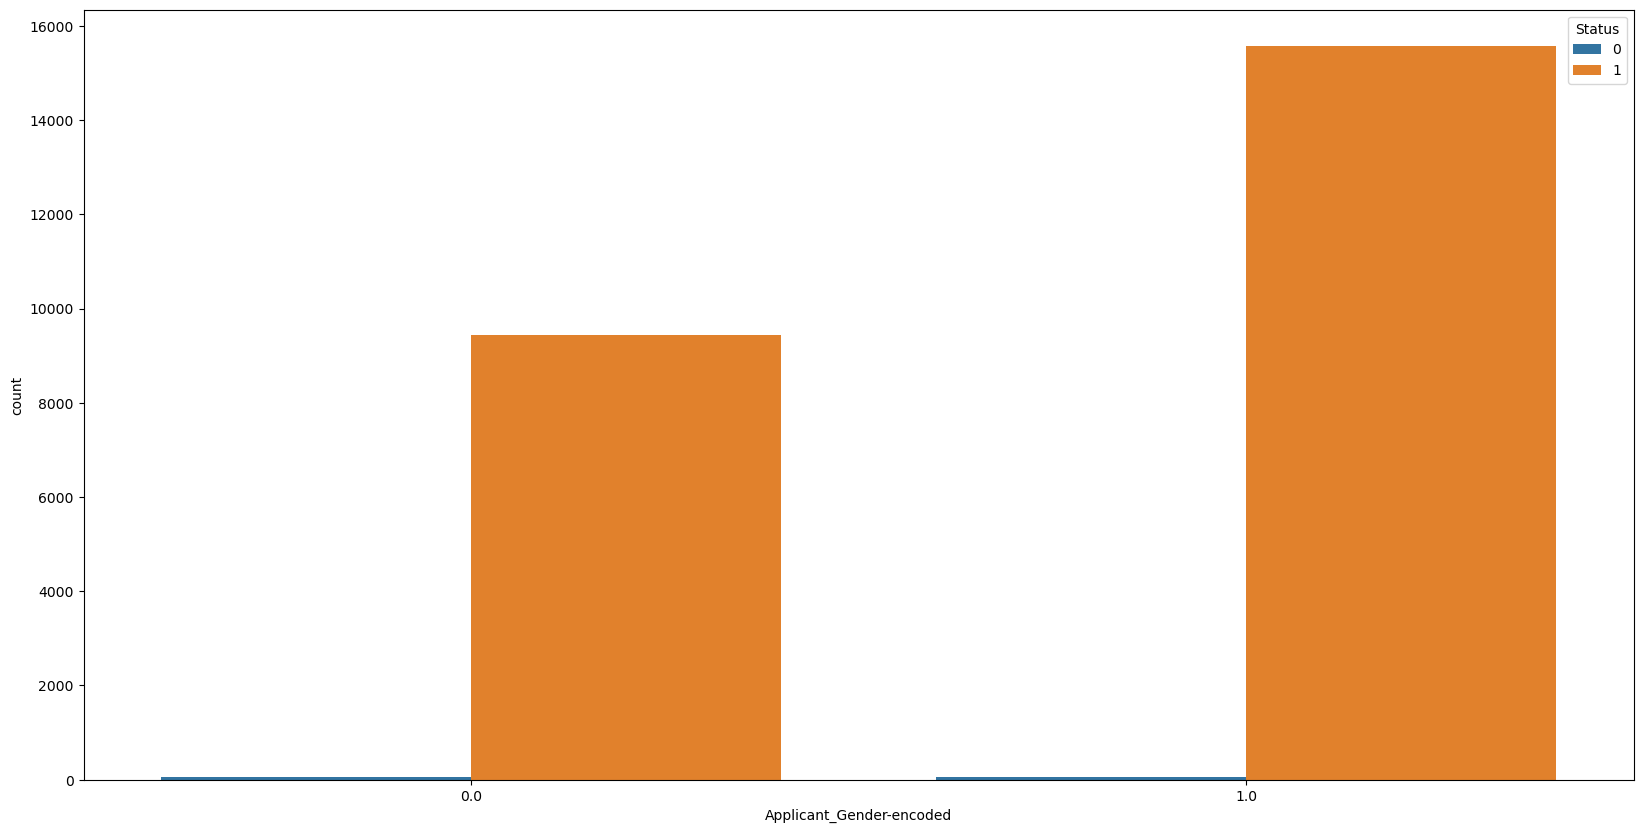

'Applicant_Gender-encoded' is a 'Good Predictor'
p_val = 0.0022602750831162326

Owned_Car:


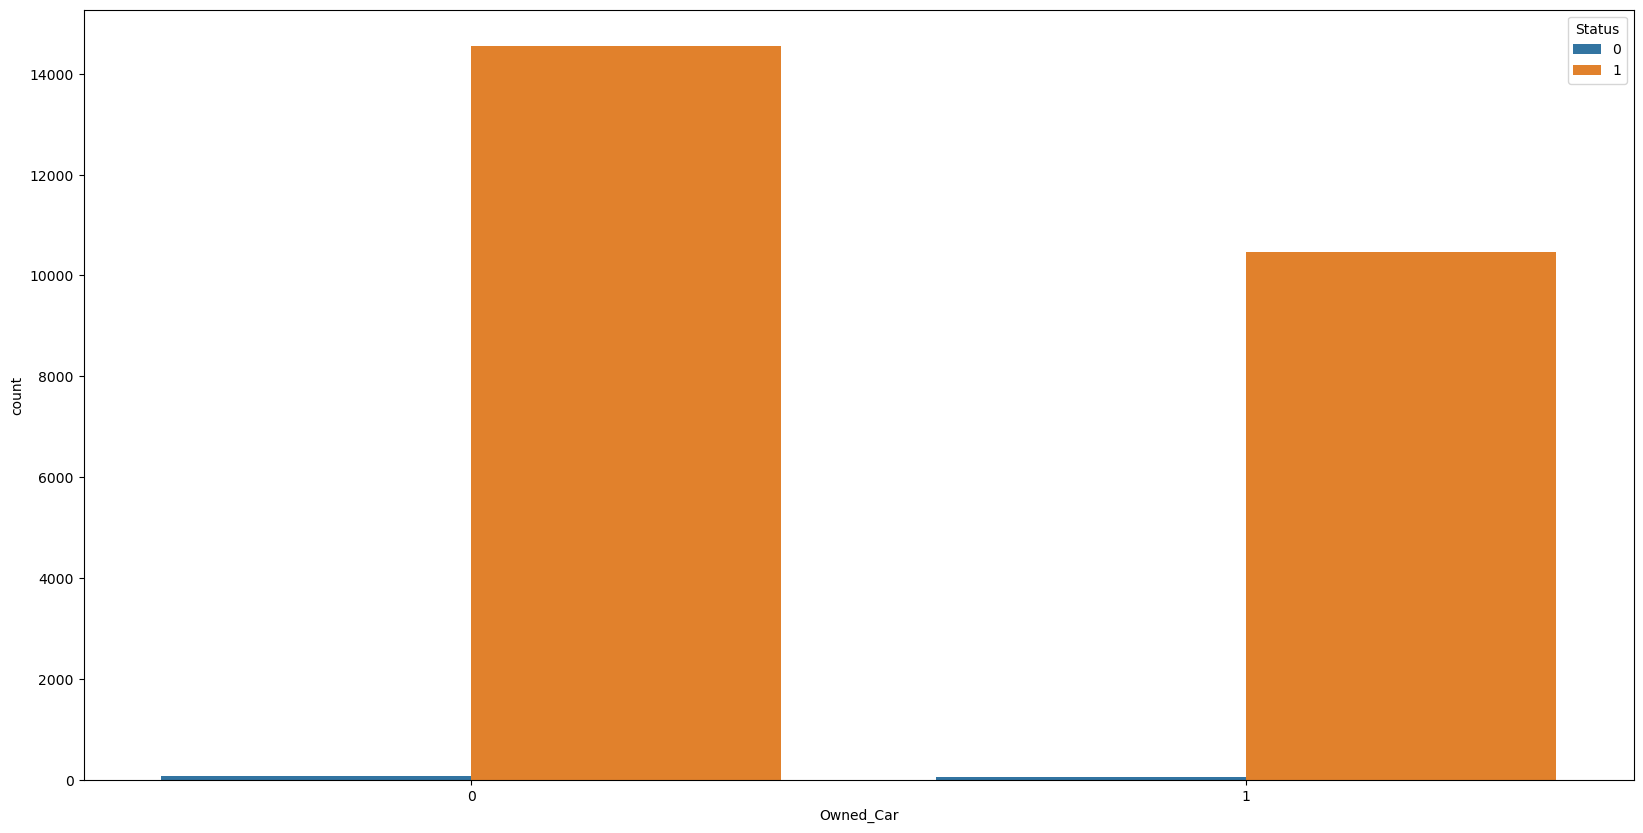

'Owned_Car' is a 'bad Predictor'
p_val = 0.7993049392286107

Owned_Realty:


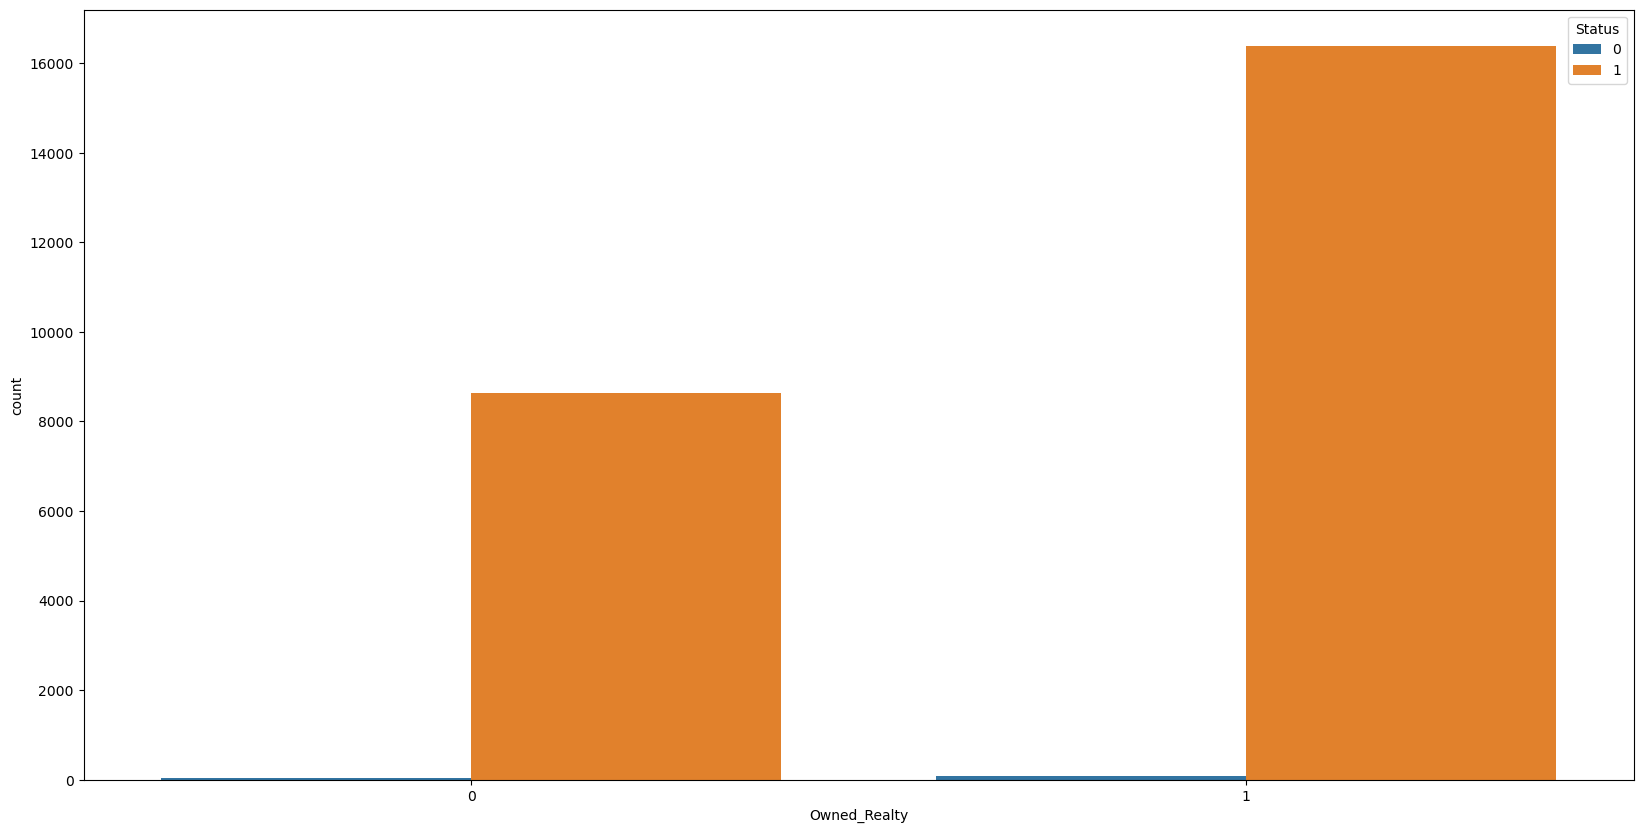

'Owned_Realty' is a 'bad Predictor'
p_val = 0.6667835931708199

Total_Children:


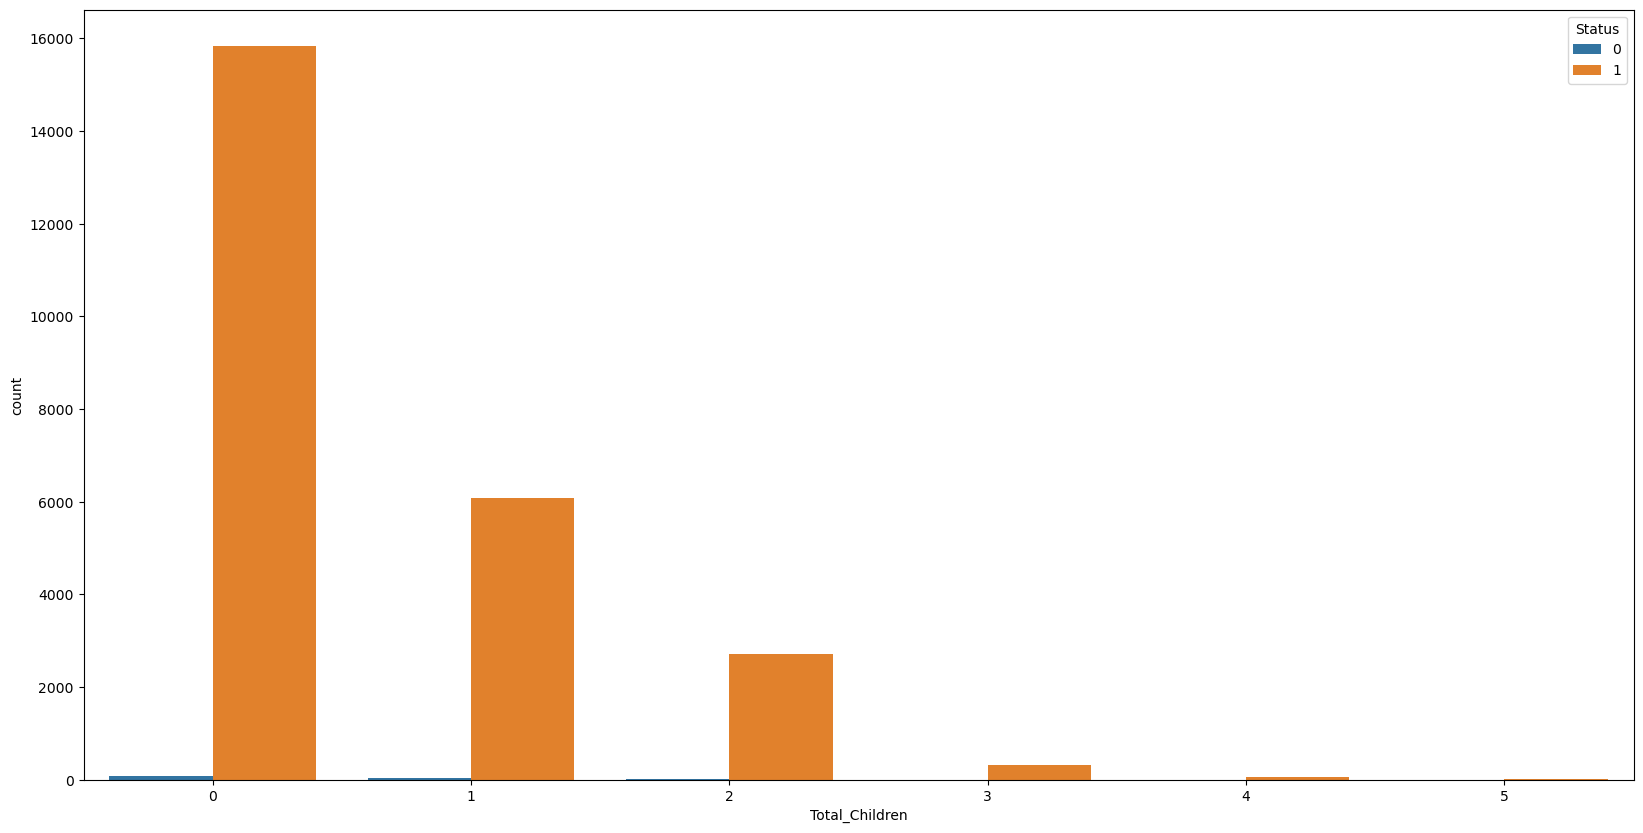

'Total_Children' is a 'bad Predictor'
p_val = 0.22692402420960772

Income_Type-encoded:


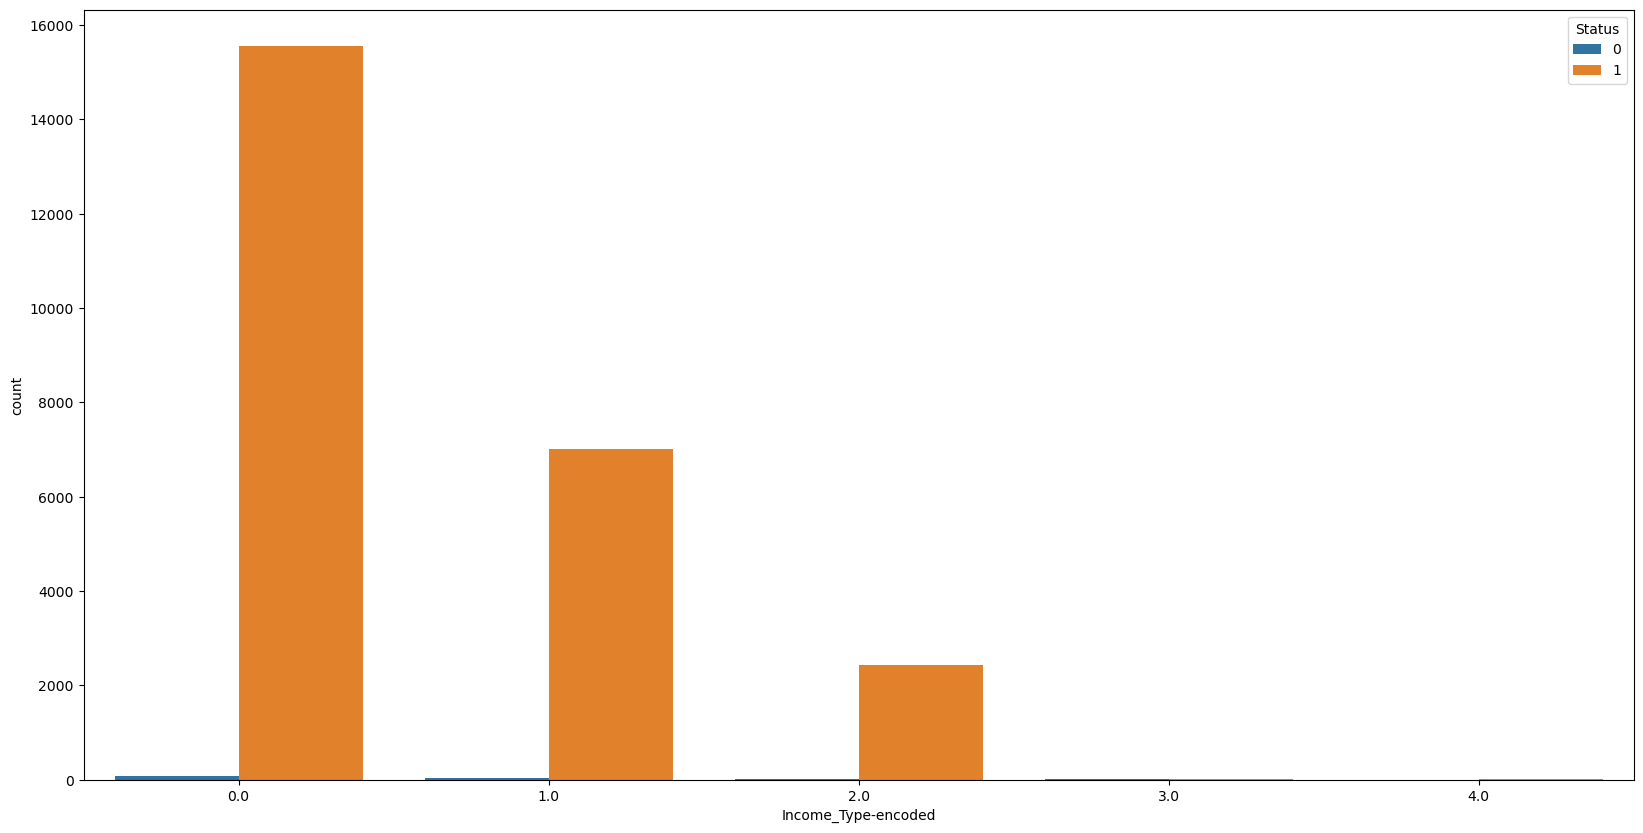

'Income_Type-encoded' is a 'Good Predictor'
p_val = 4.045355691001316e-54

Education_Type-encoded:


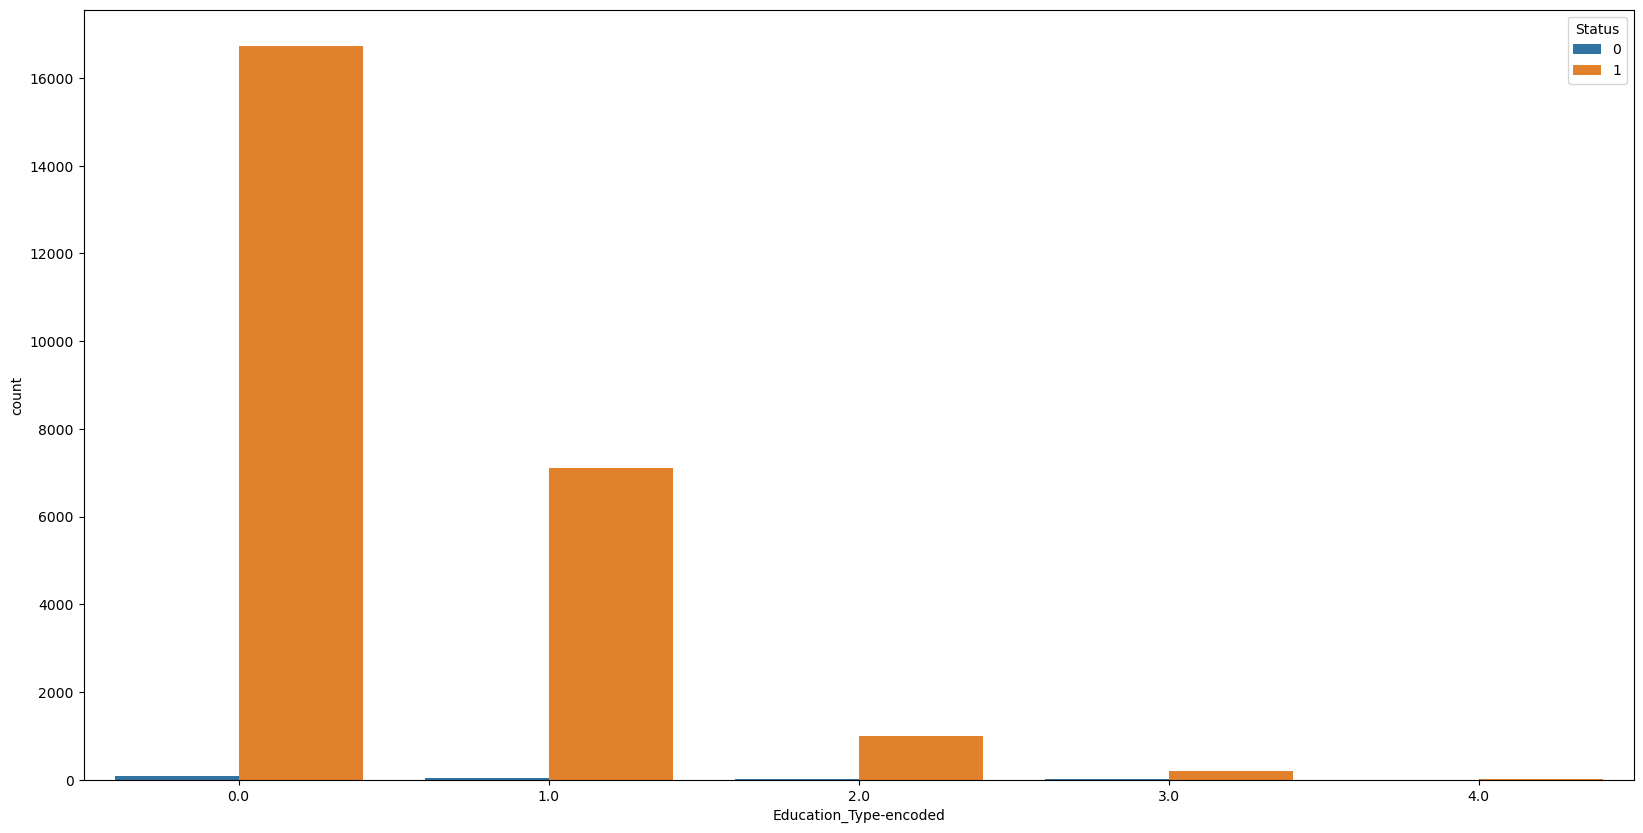

'Education_Type-encoded' is a 'bad Predictor'
p_val = 0.7359928594282634

Family_Status-encoded:


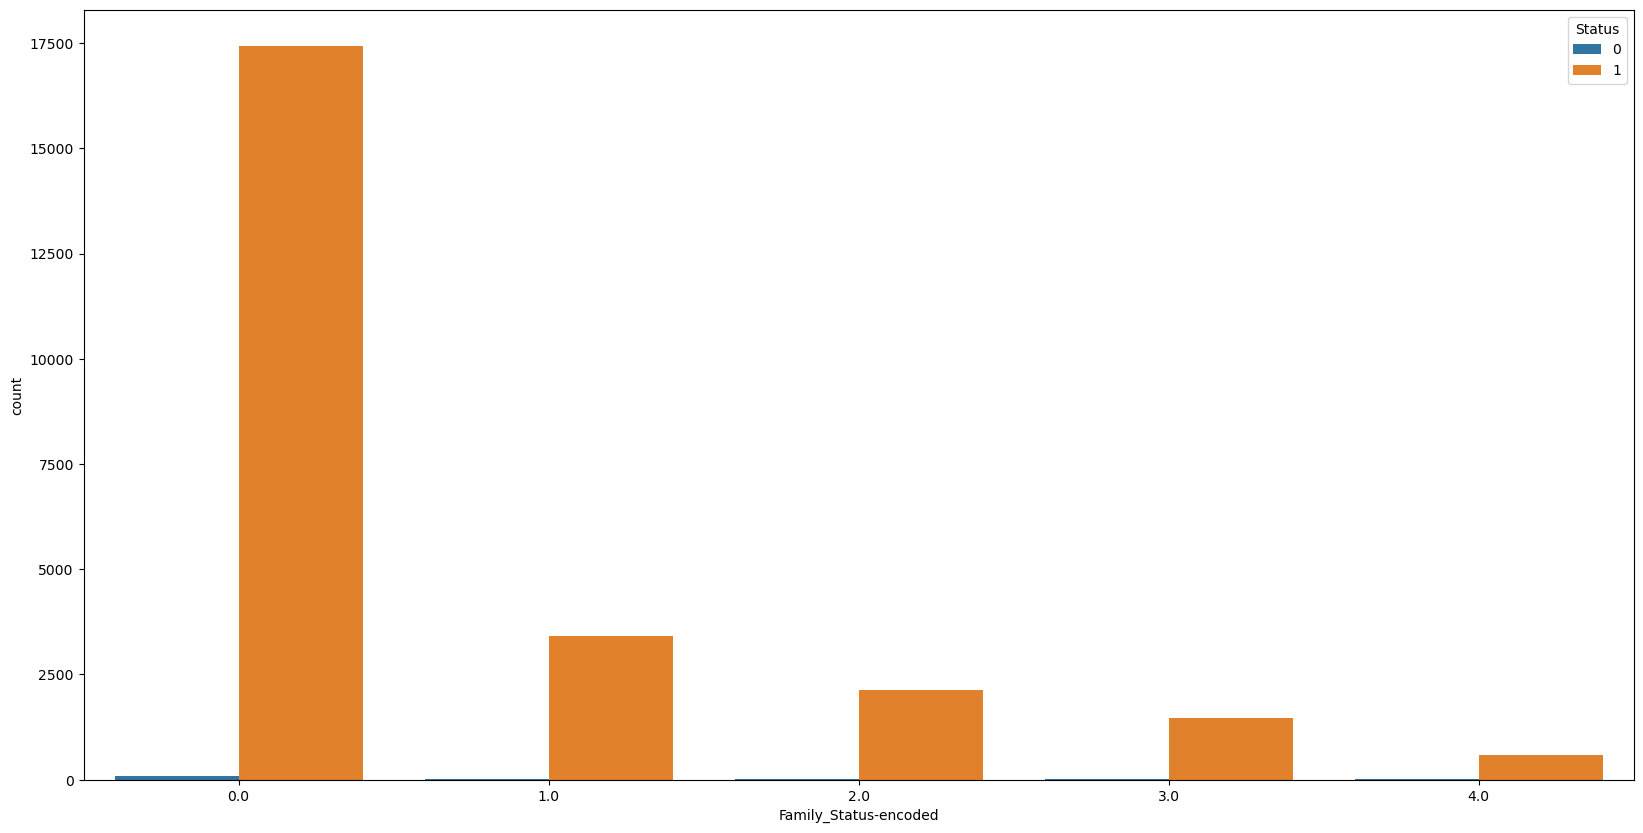

'Family_Status-encoded' is a 'bad Predictor'
p_val = 0.15367634550565243

Housing_Type-encoded:


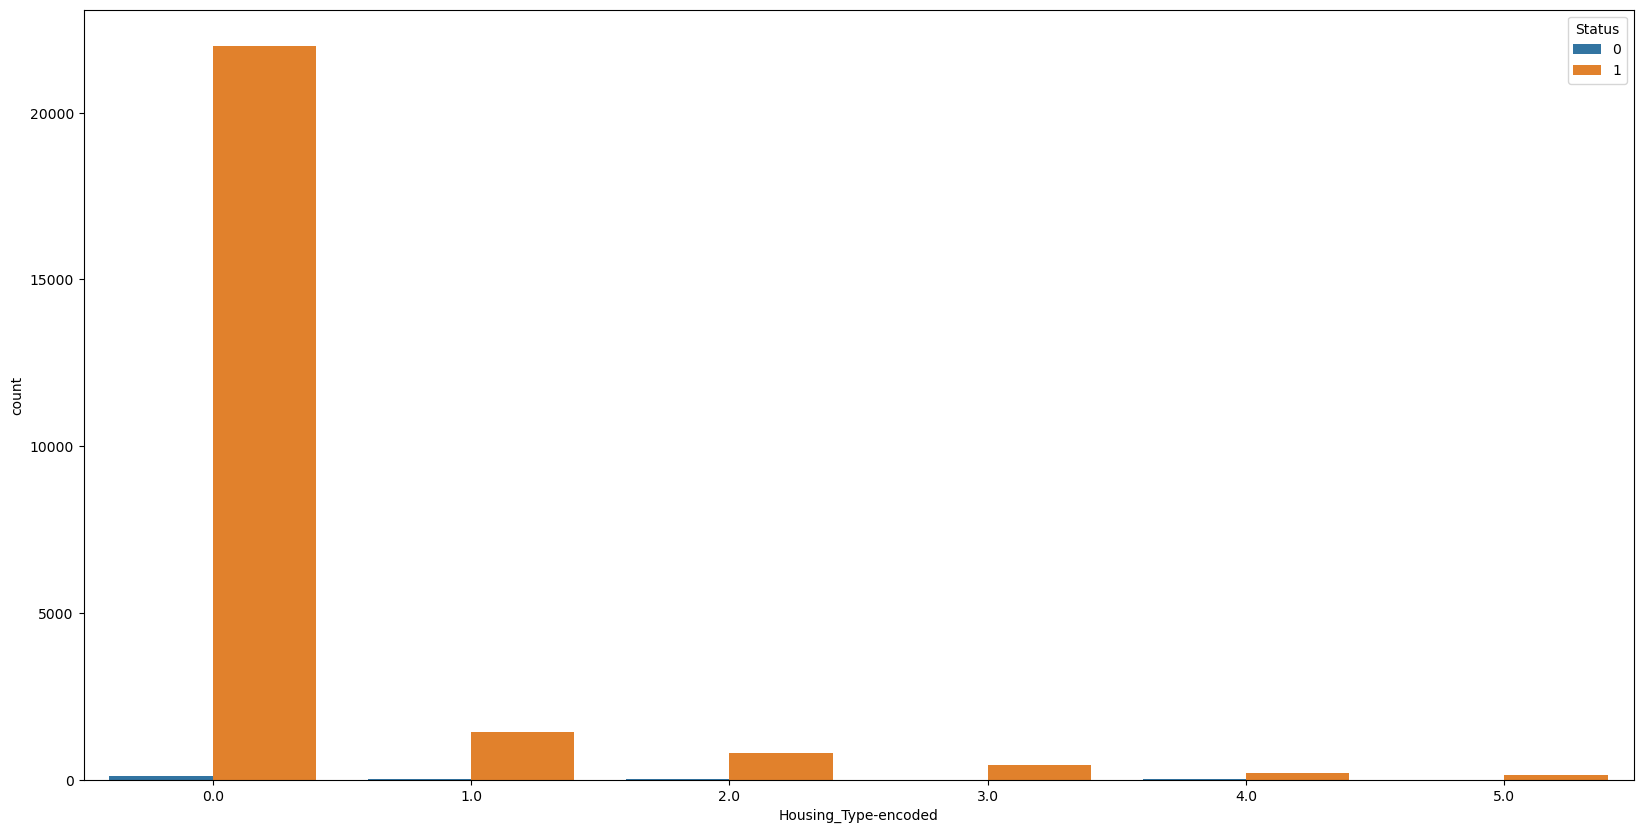

'Housing_Type-encoded' is a 'Good Predictor'
p_val = 0.0017353119448546281

Owned_Work_Phone:


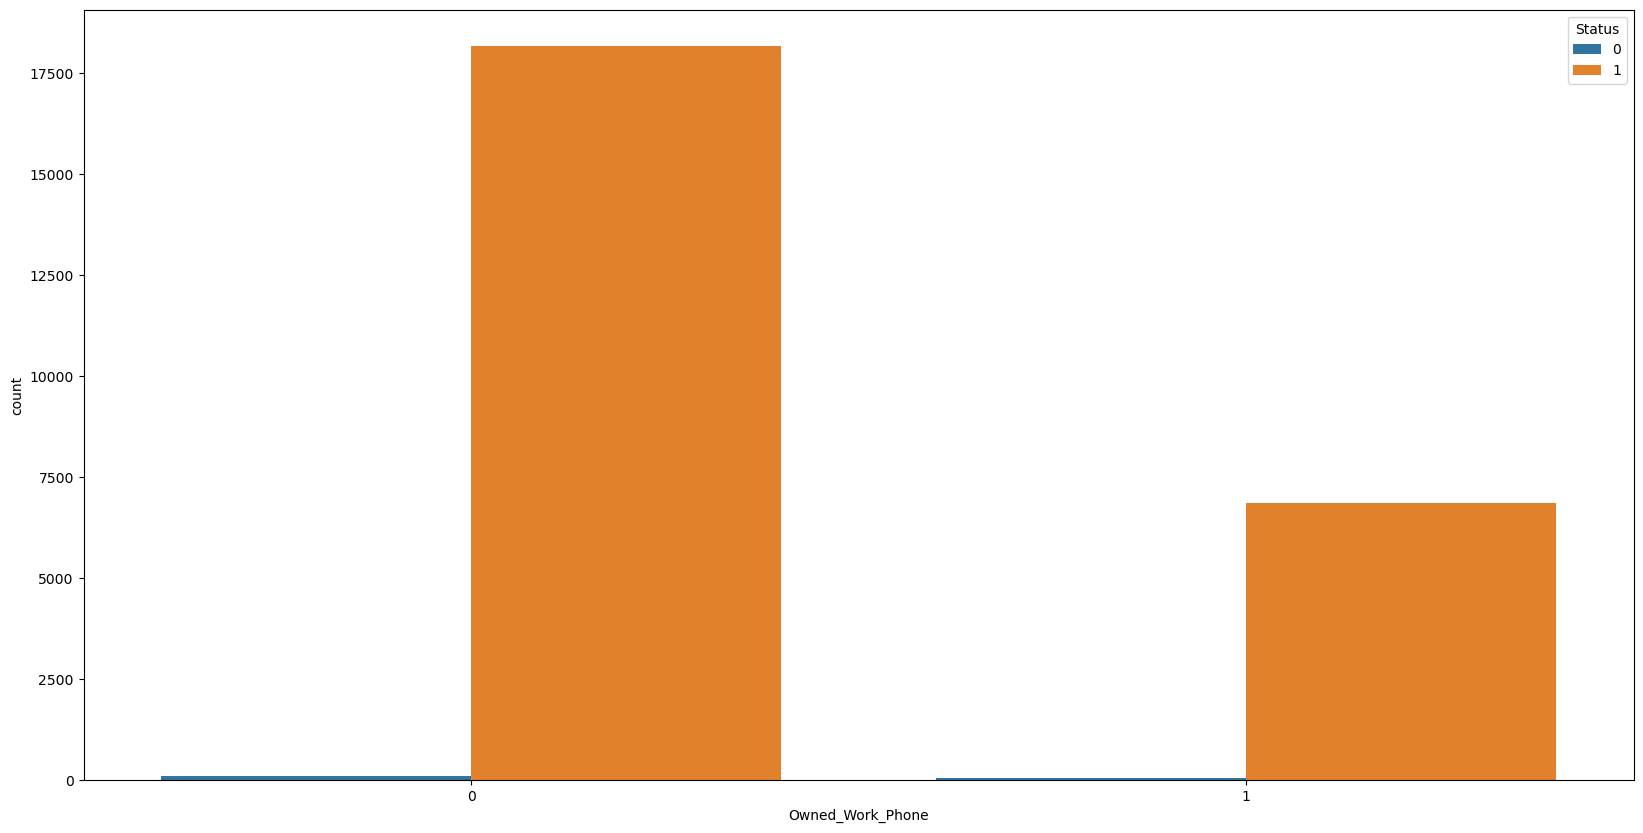

'Owned_Work_Phone' is a 'bad Predictor'
p_val = 0.3992257832560753

Owned_Email:


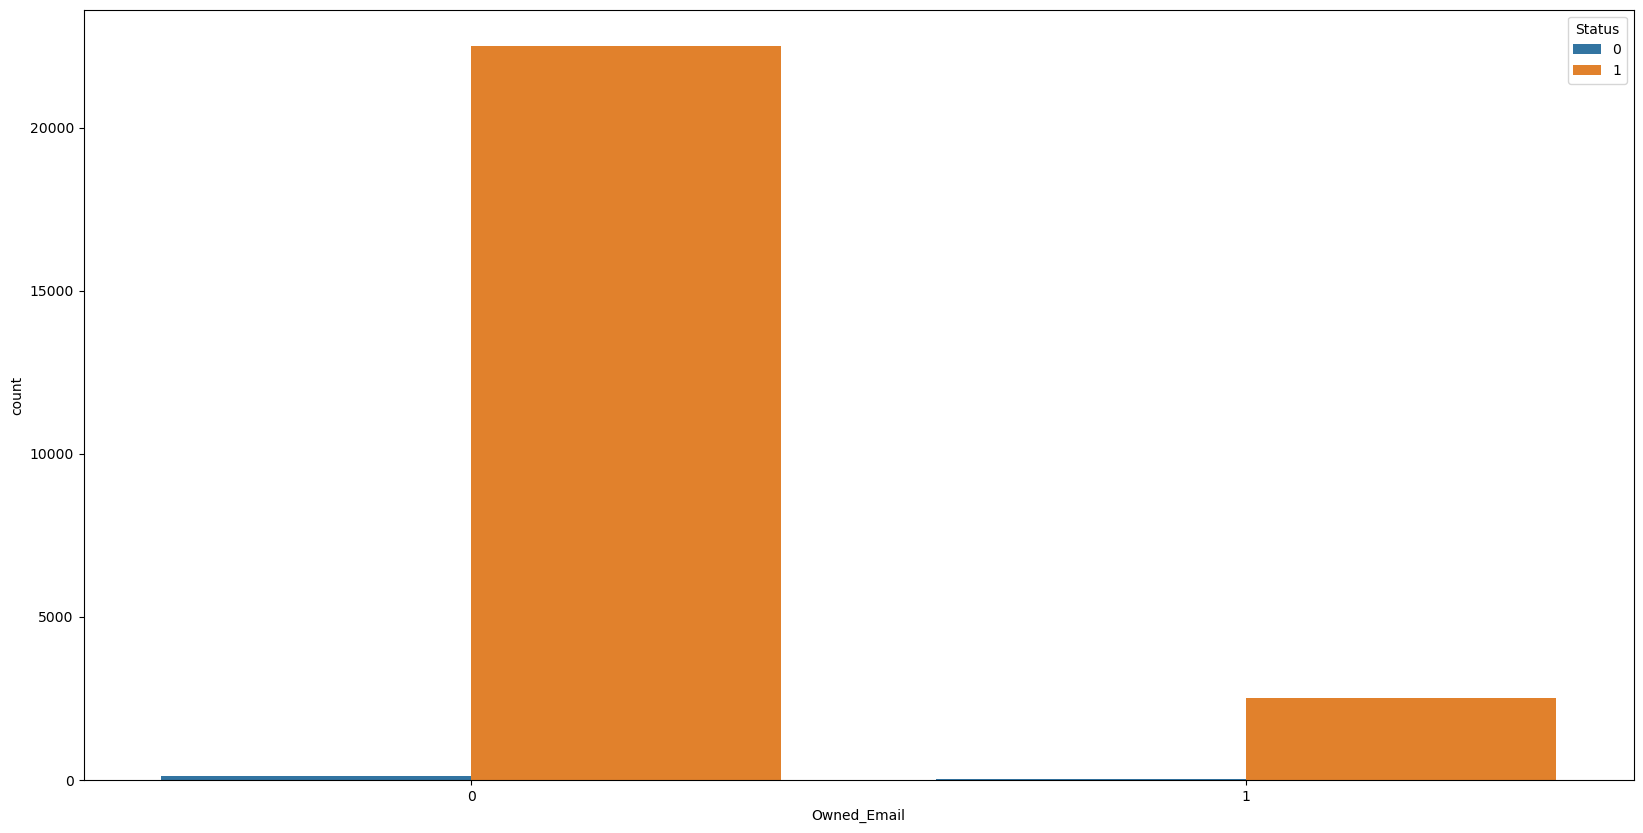

'Owned_Email' is a 'bad Predictor'
p_val = 0.1446063792090874

Job_Title-encoded:


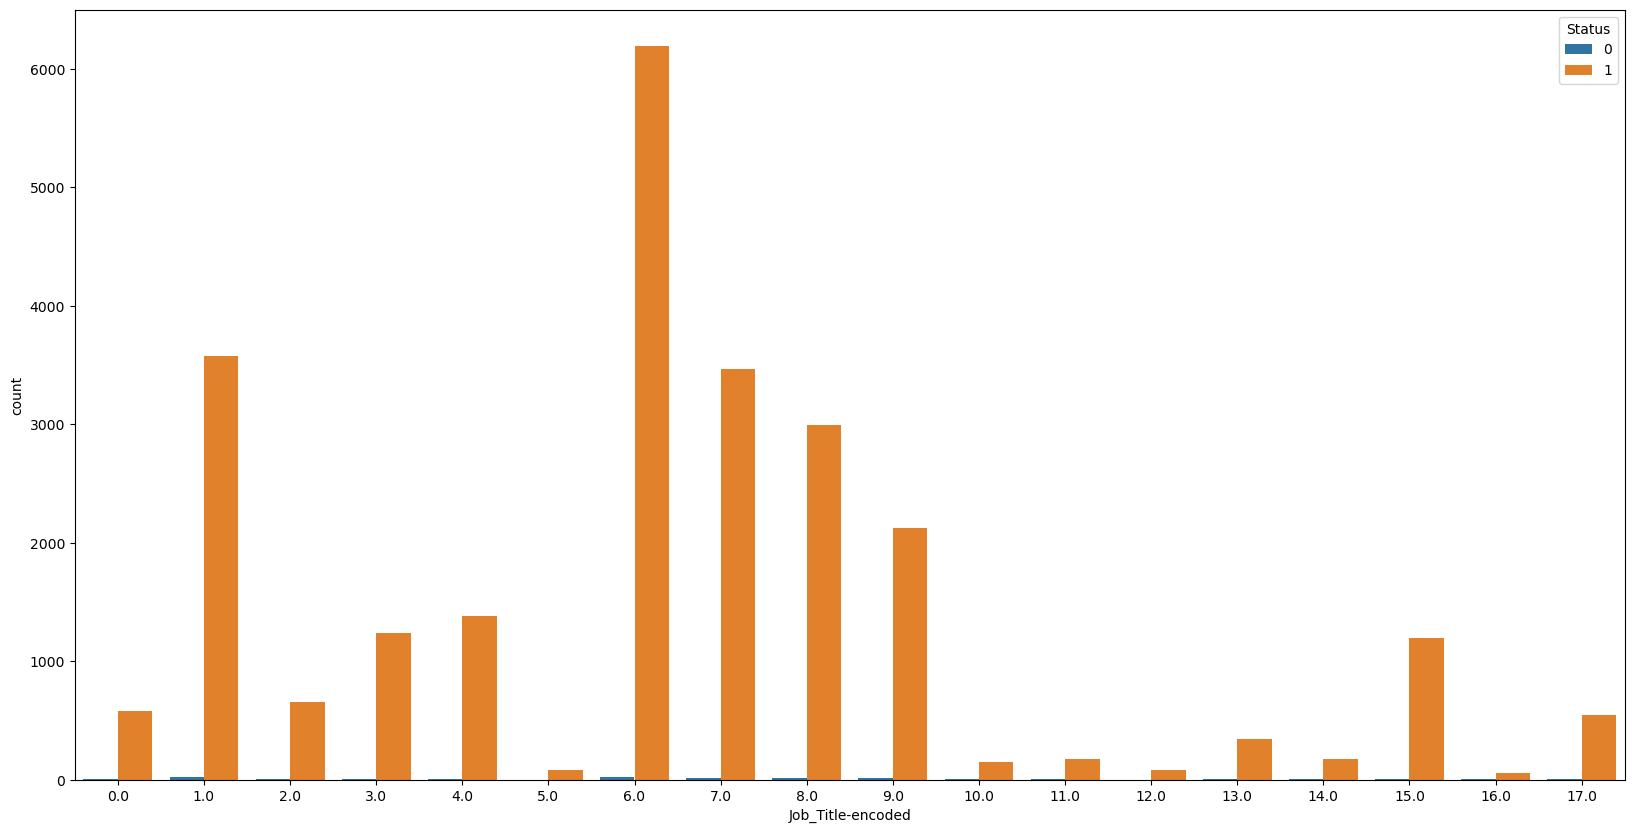

'Job_Title-encoded' is a 'Good Predictor'
p_val = 1.2405686046995852e-14

Total_Family_Members:


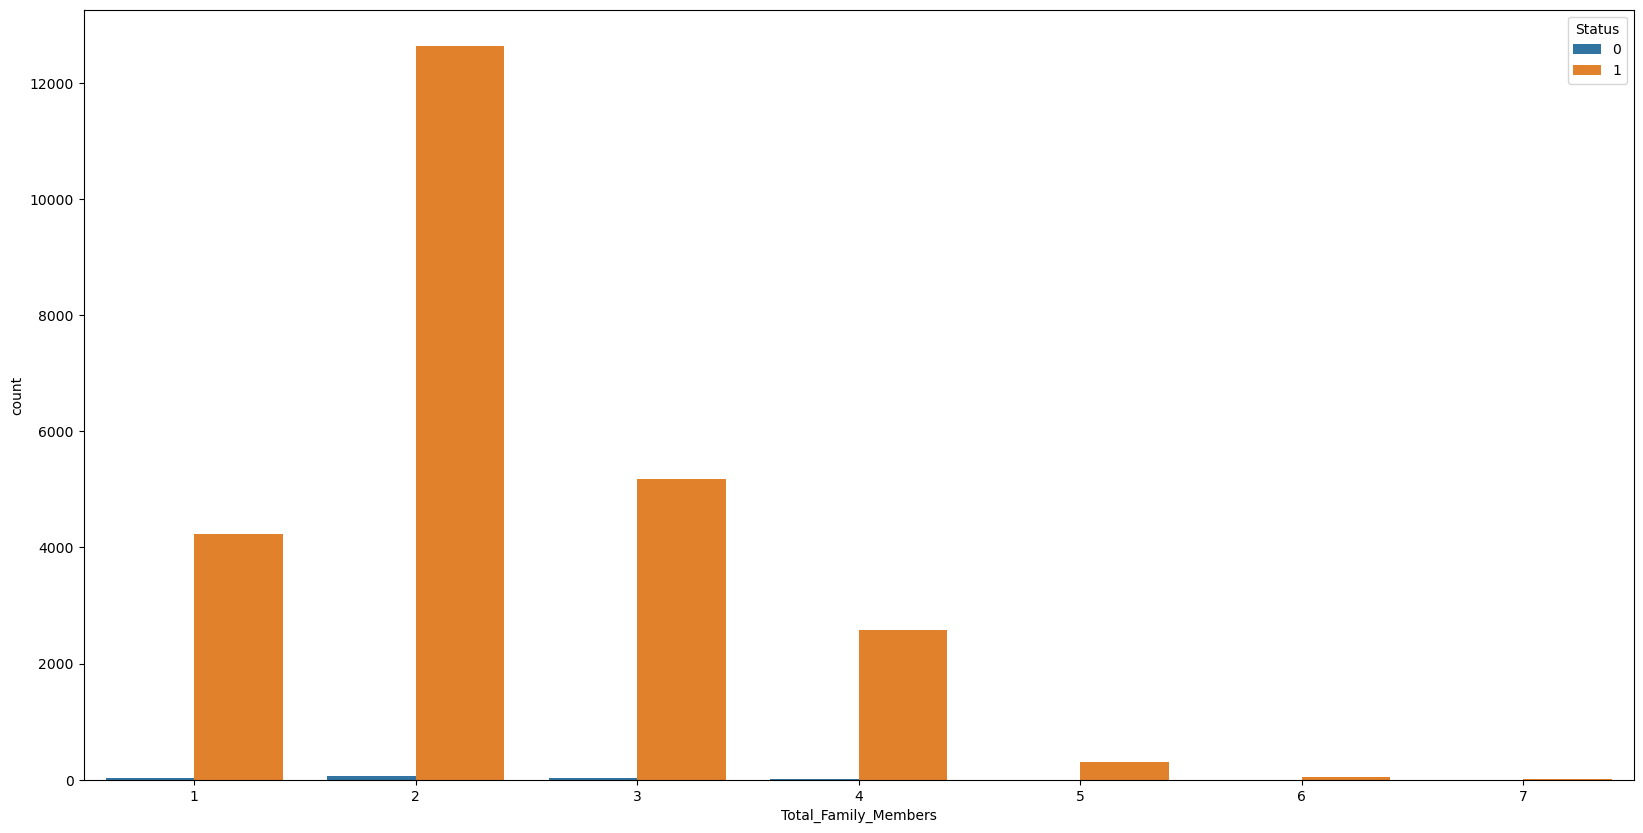

'Total_Family_Members' is a 'bad Predictor'
p_val = 0.3082661599429272

Status:


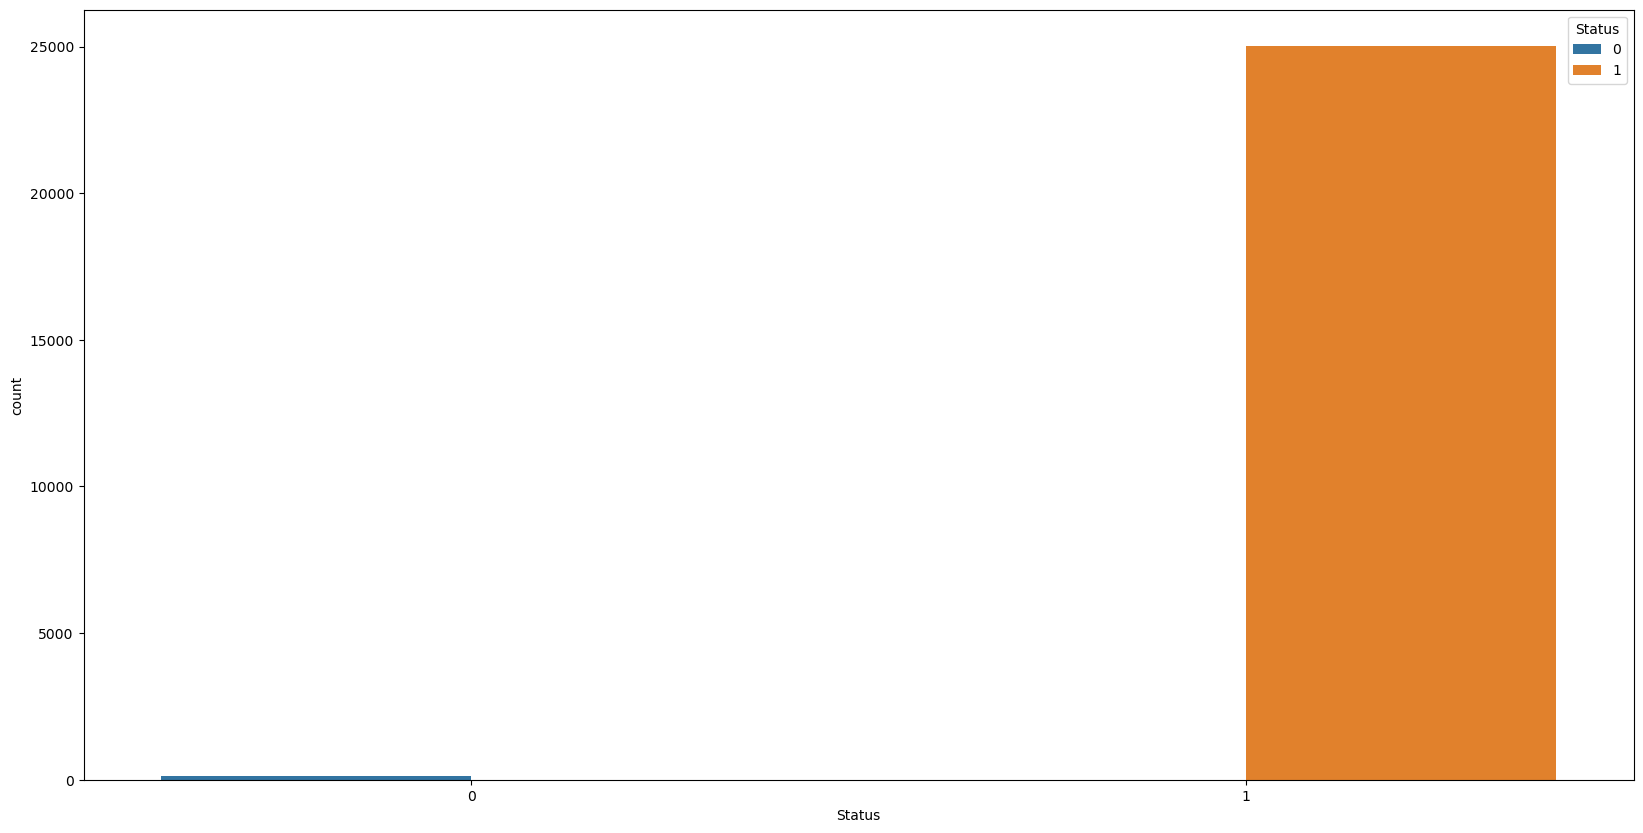

'Status' is a 'Good Predictor'
p_val = 0.0



In [37]:
for i in category:
    print(i+":")
    plt.figure(figsize=(20,10))
    sns.countplot(x=i,data=df,hue='Status')
    plt.show()
    a=np.array(pd.crosstab(df.Status,df[i]))
    (stats,p,dof,_)=chi2_contingency(a,correction=False)
    if p>0.05:
        print(Fore.RED +"'{}' is a 'bad Predictor'".format(i))
        print("p_val = {}\n".format(p))
    else:
        print(Fore.GREEN +"'{}' is a 'Good Predictor'".format(i))
        print("p_val = {}\n".format(p))

### Variables continuas:

In [38]:
column_names = df.columns.tolist()
continious=list(set(column_names)-set(category))

In [39]:
continious

['Applicant_Age',
 'Total_Good_Debt',
 'Total_Income',
 'Total_Bad_Debt',
 'Years_of_Working']

In [40]:
df.loc[:,continious]

Applicant_Age  Total_Good_Debt  Total_Income  Total_Bad_Debt  \
0                 59               30        112500               0   
1                 53                5        270000               0   
2                 53                5        270000               0   
3                 53               27        270000               0   
4                 53               39        270000               0   
...              ...              ...           ...             ...   
25123             30               18        157500               0   
25124             30               18        157500               0   
25125             30               13        157500               0   
25126             30                2        157500               0   
25127             54               30        202500               0   

       Years_of_Working  
0                     4  
1                     9  
2                     9  
3                     9  
4                     9  
...                 ...  
25123                 5  
25124                 5  
25125                 5  
25126                 5  
25127                 6  

[25128 rows x 5 columns]

Applicant_Age:


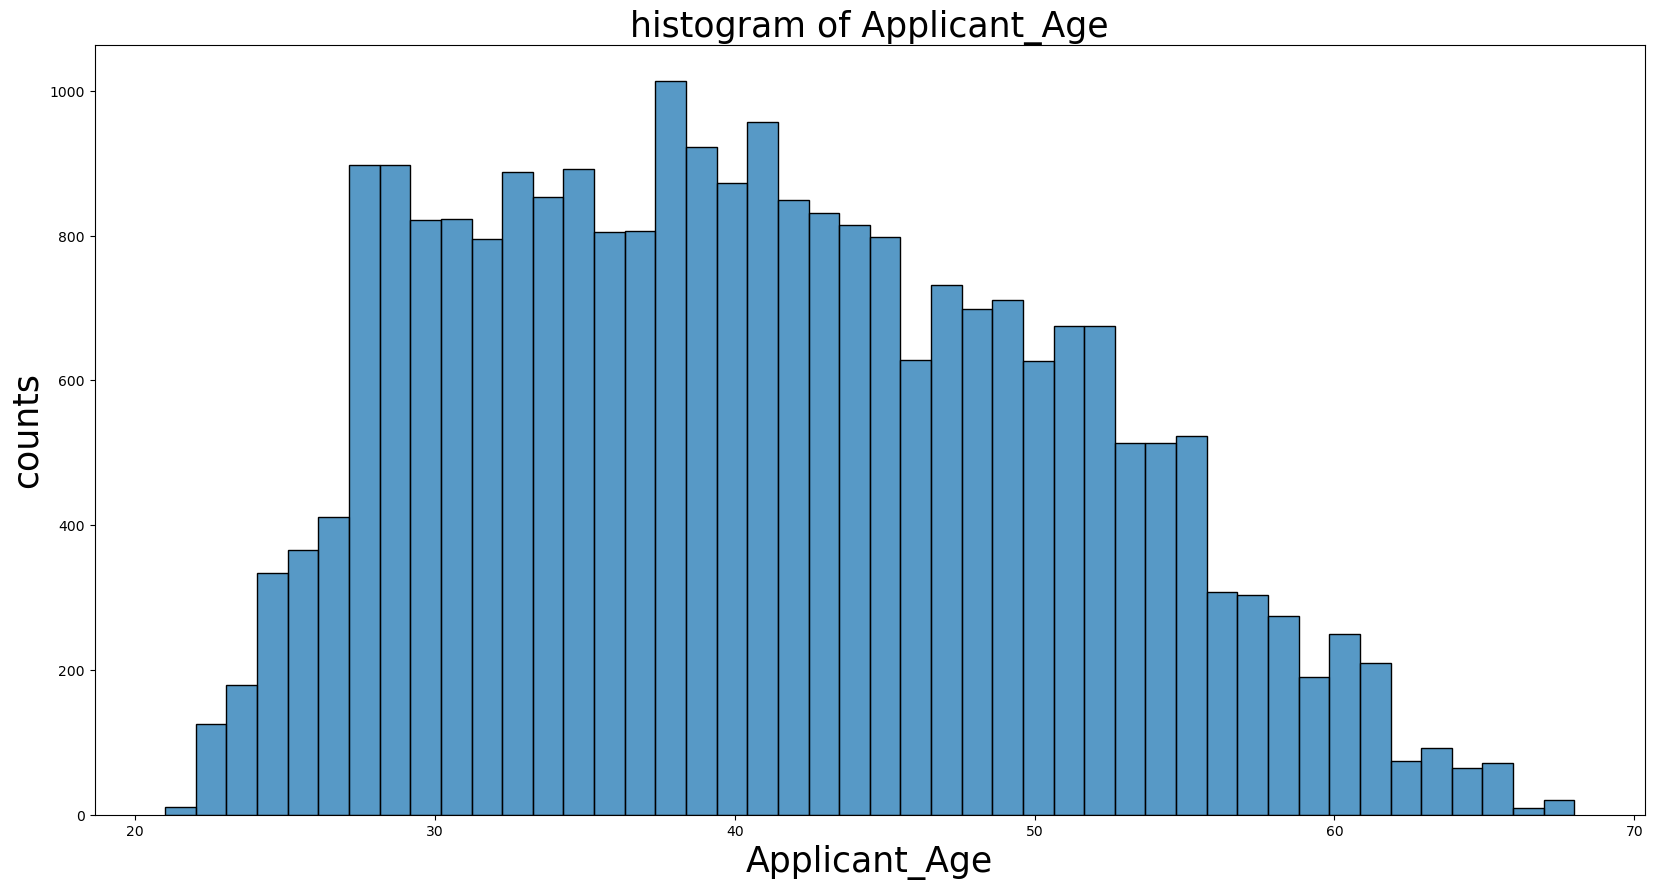

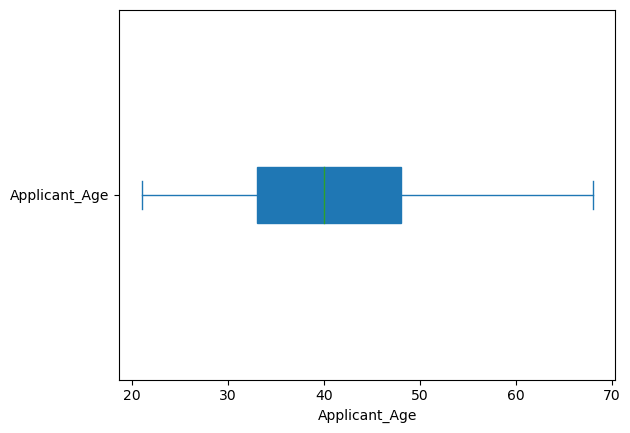

Total_Good_Debt:


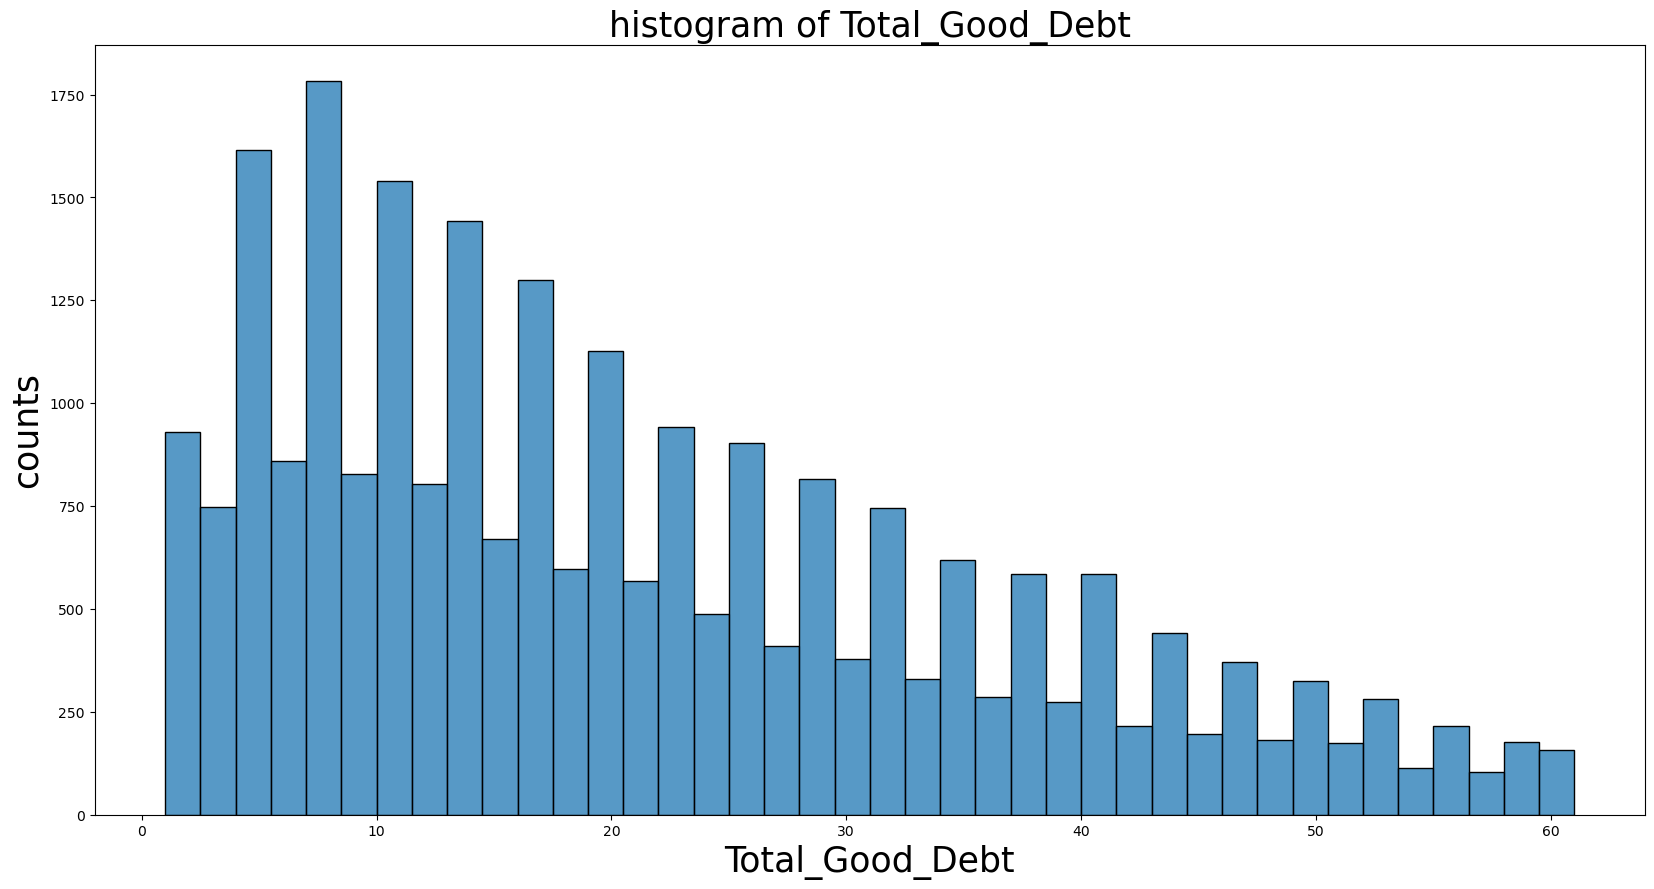

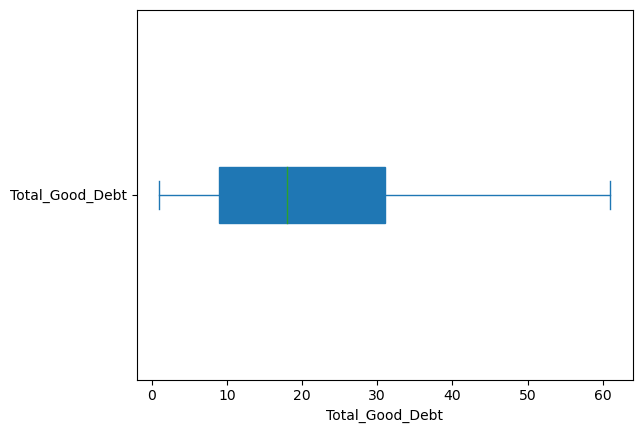

Total_Income:


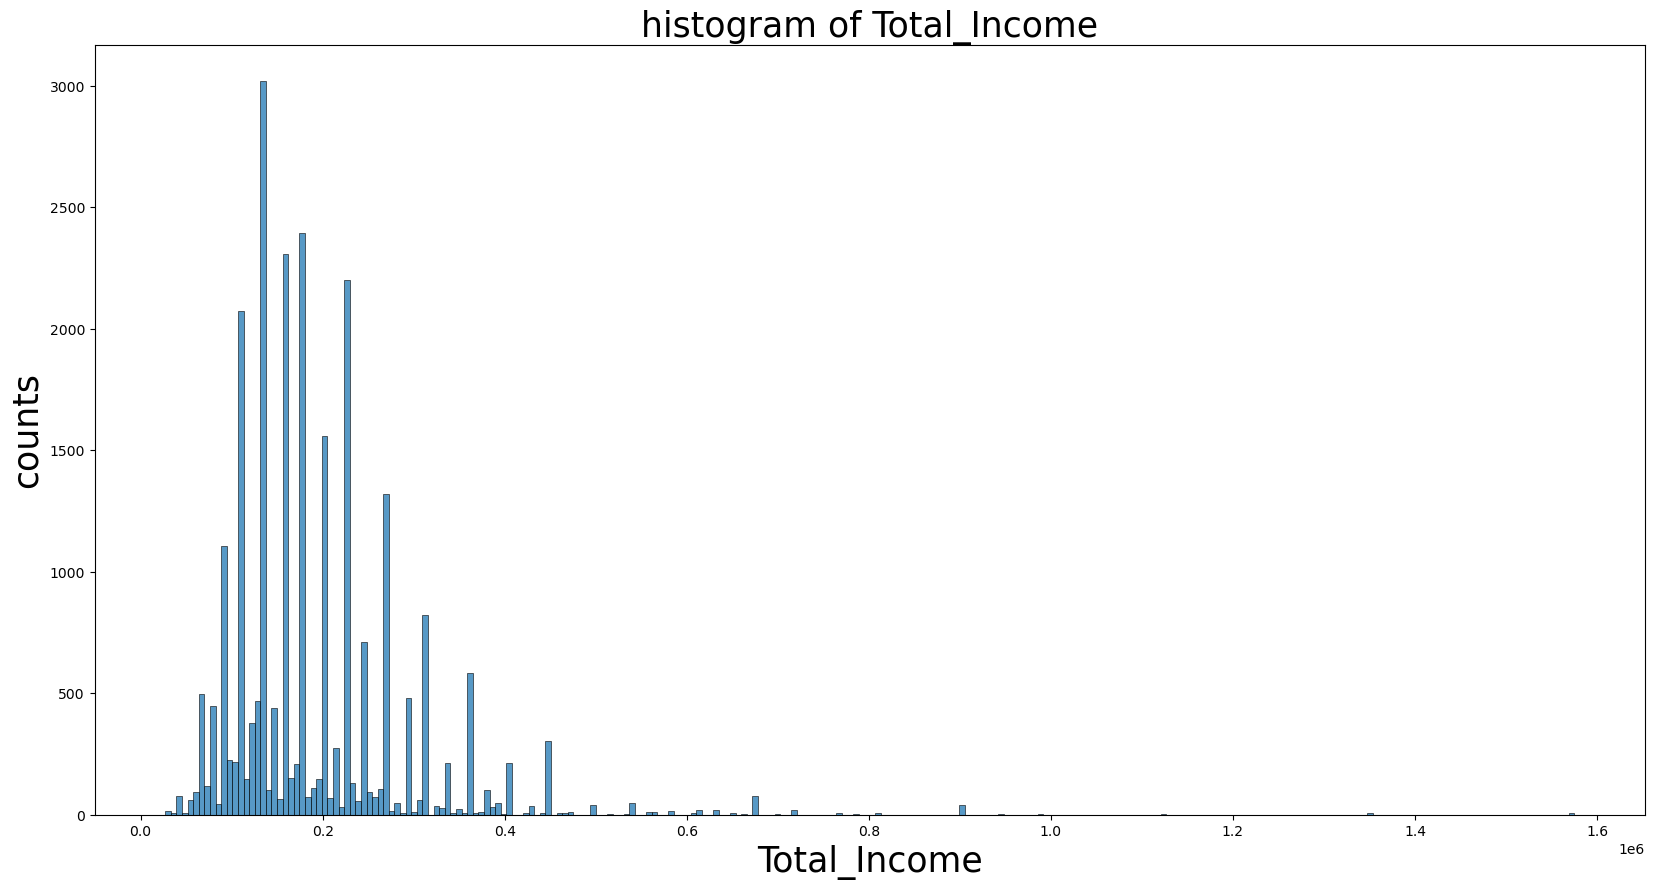

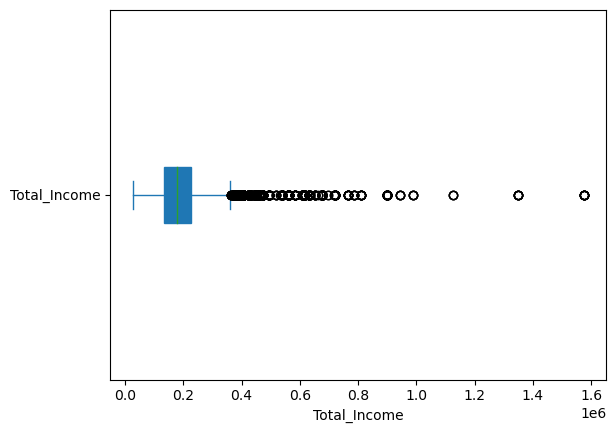

Total_Bad_Debt:


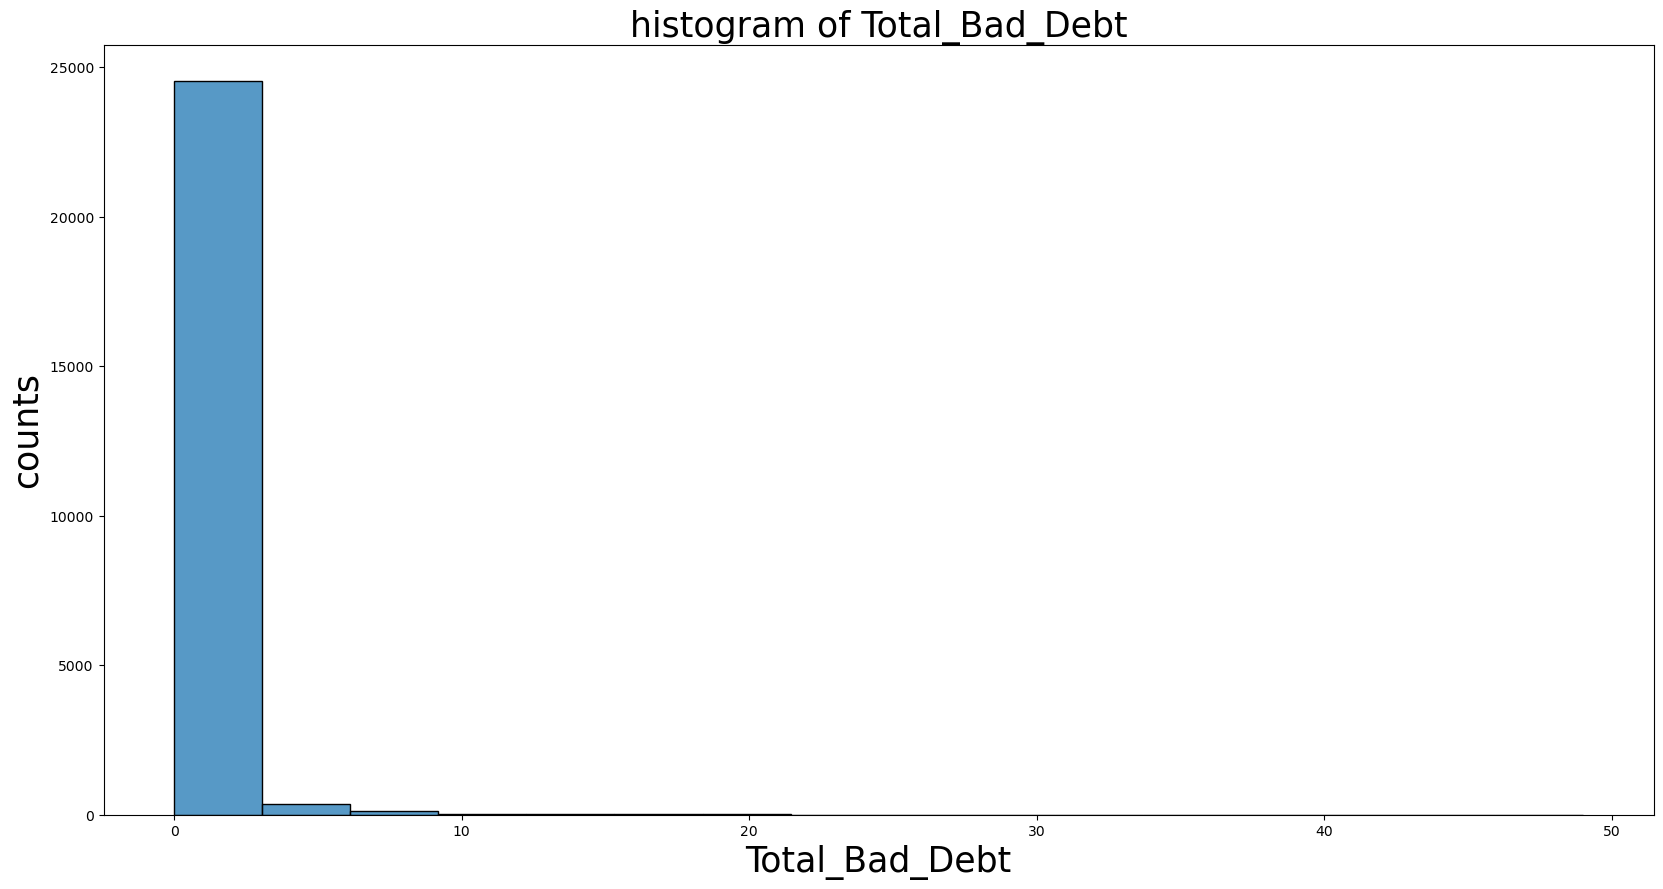

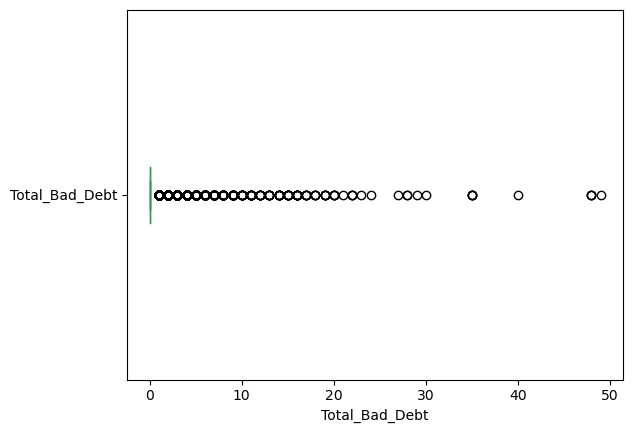

Years_of_Working:


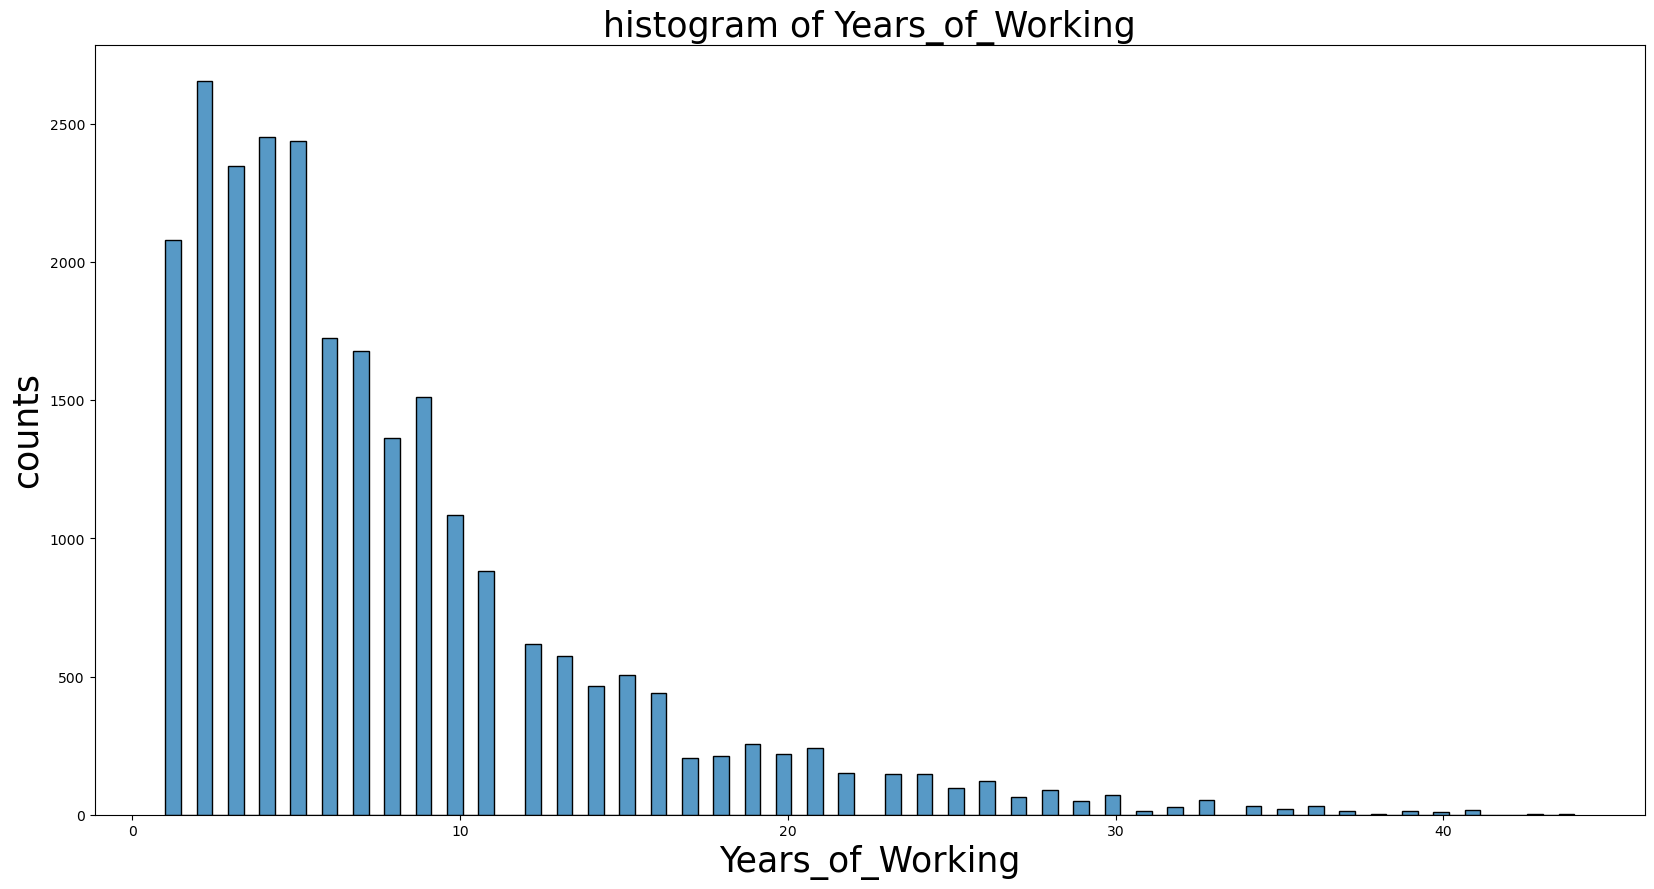

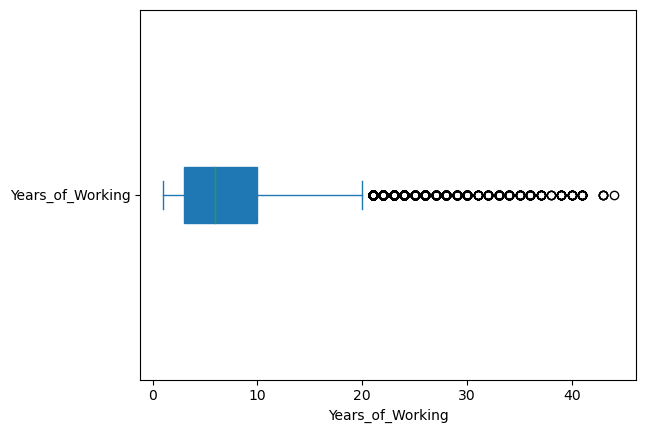

In [41]:
for i in continious:
    print(i+":")
    plt.figure(figsize=(20,10))
    sns.histplot(df[i])
    plt.xlabel(i, fontsize=25)
    plt.ylabel('counts', fontsize=25)
    plt.title('histogram of '+i, fontsize=25)
    plt.show()
    df[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()

### Tratamos los Outliers

In [42]:
iqr=iqr

In [43]:
for i in continious:
    median = np.median(df[i])
    print(i,'median:',median)

Applicant_Age median: 40.0
Total_Good_Debt median: 18.0
Total_Income median: 180000.0
Total_Bad_Debt median: 0.0
Years_of_Working median: 6.0


Applicant_Age:


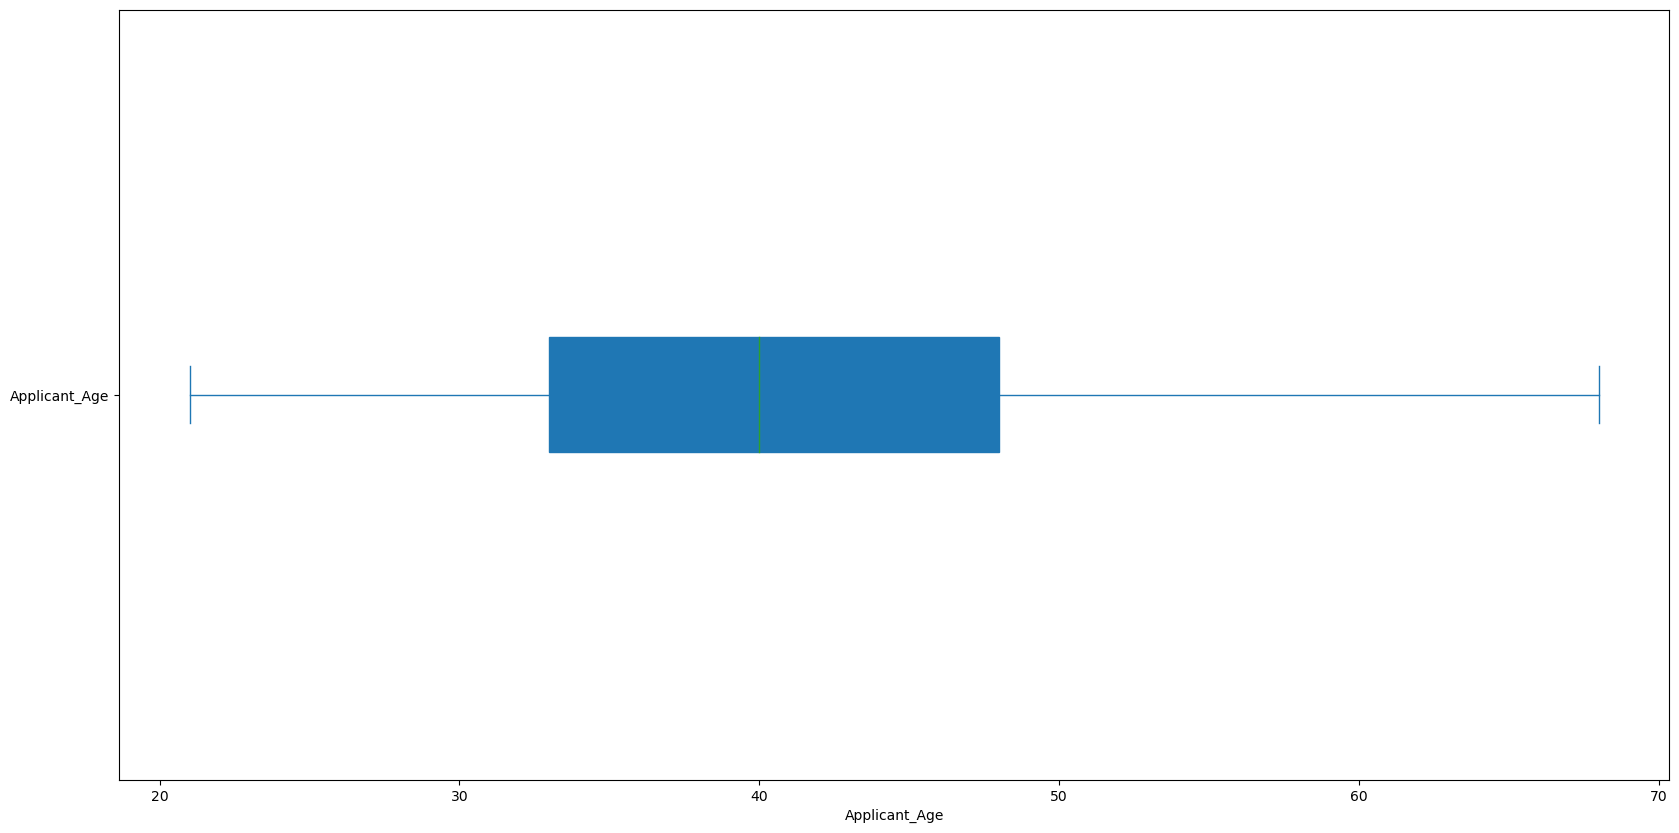

left limit:10.5
right limit:70.5
iqr:15.0


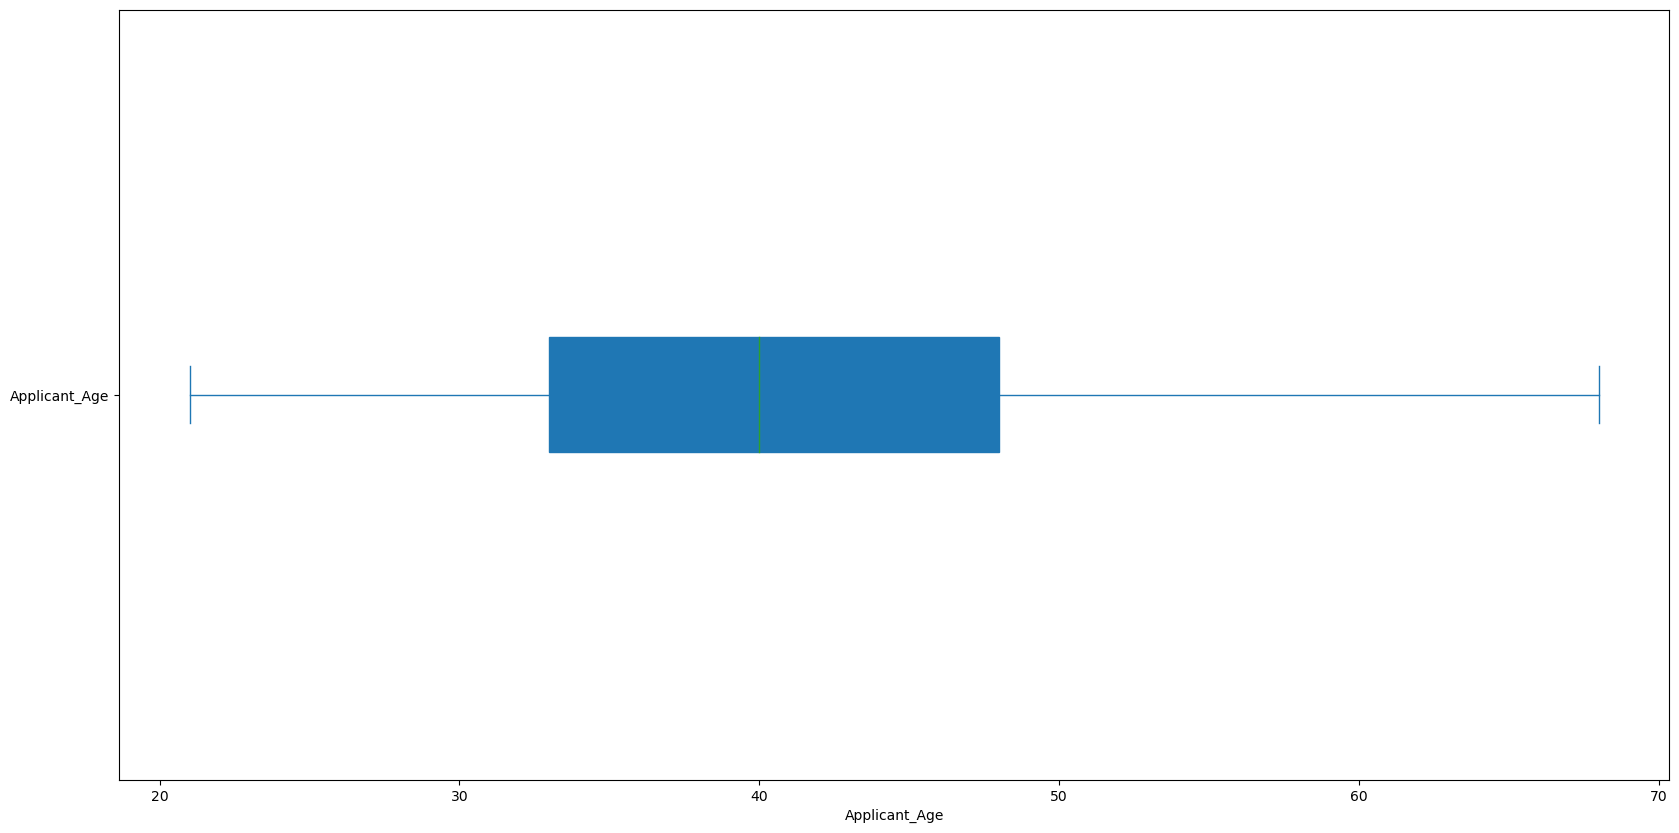

Total_Good_Debt:


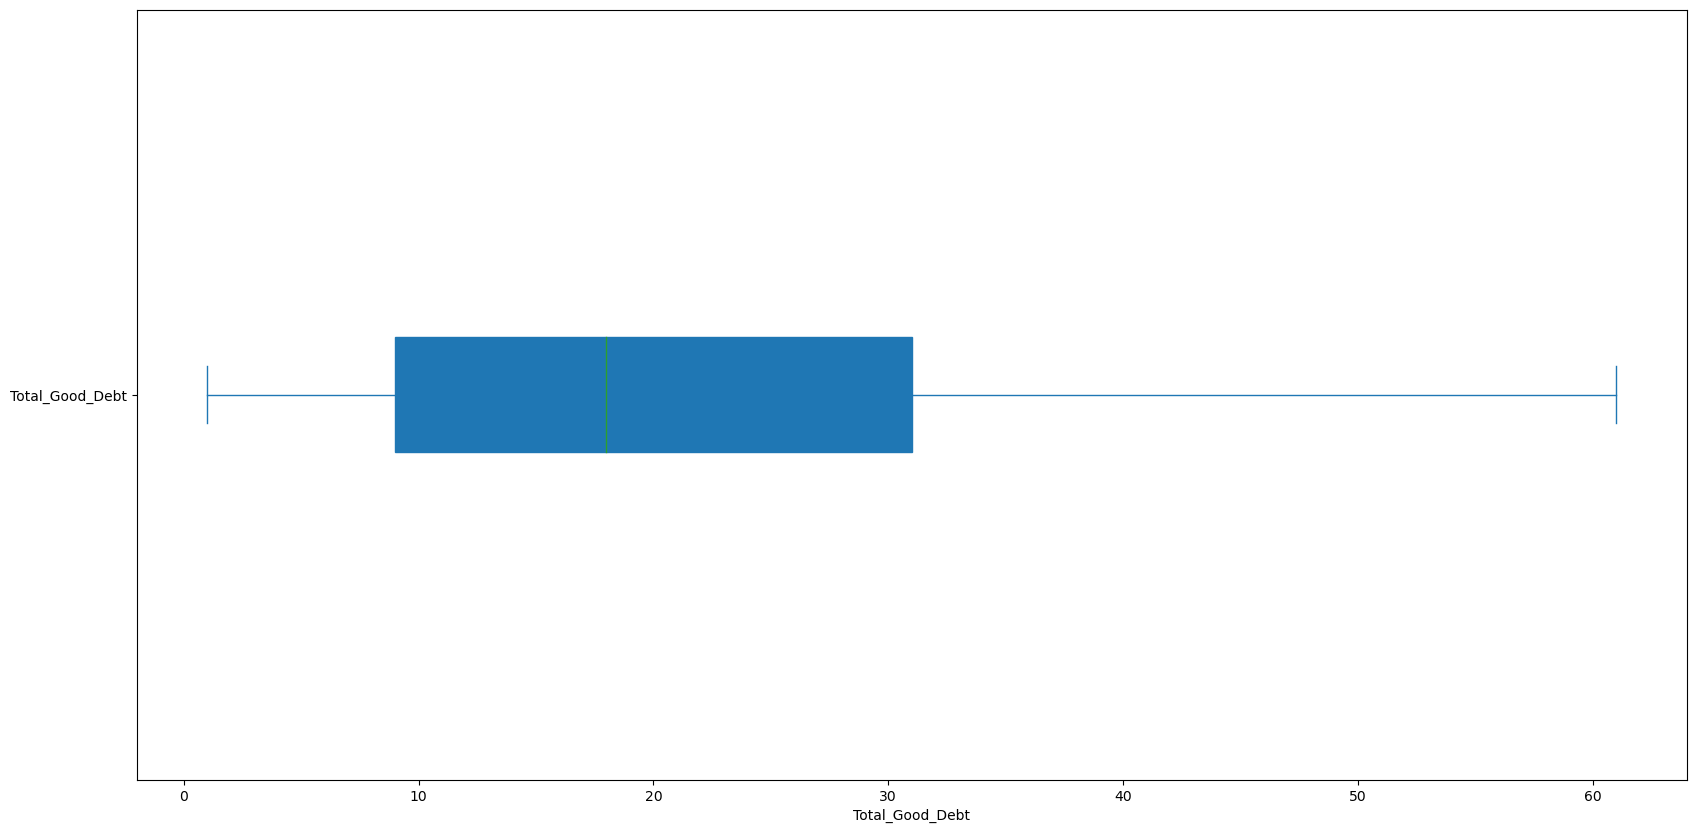

left limit:-24.0
right limit:64.0
iqr:22.0


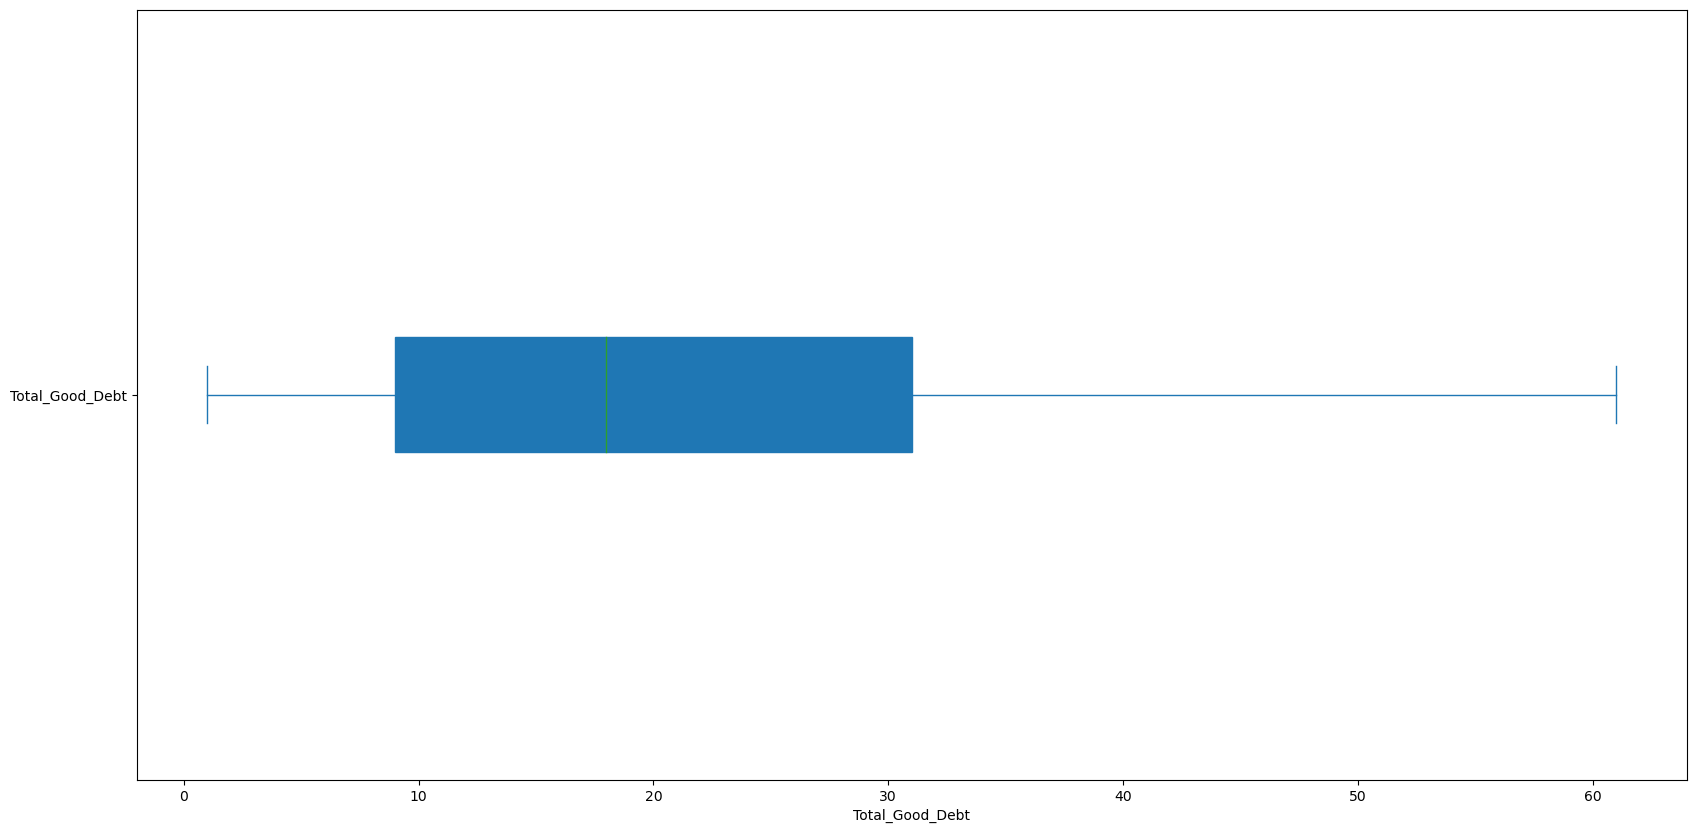

Total_Income:


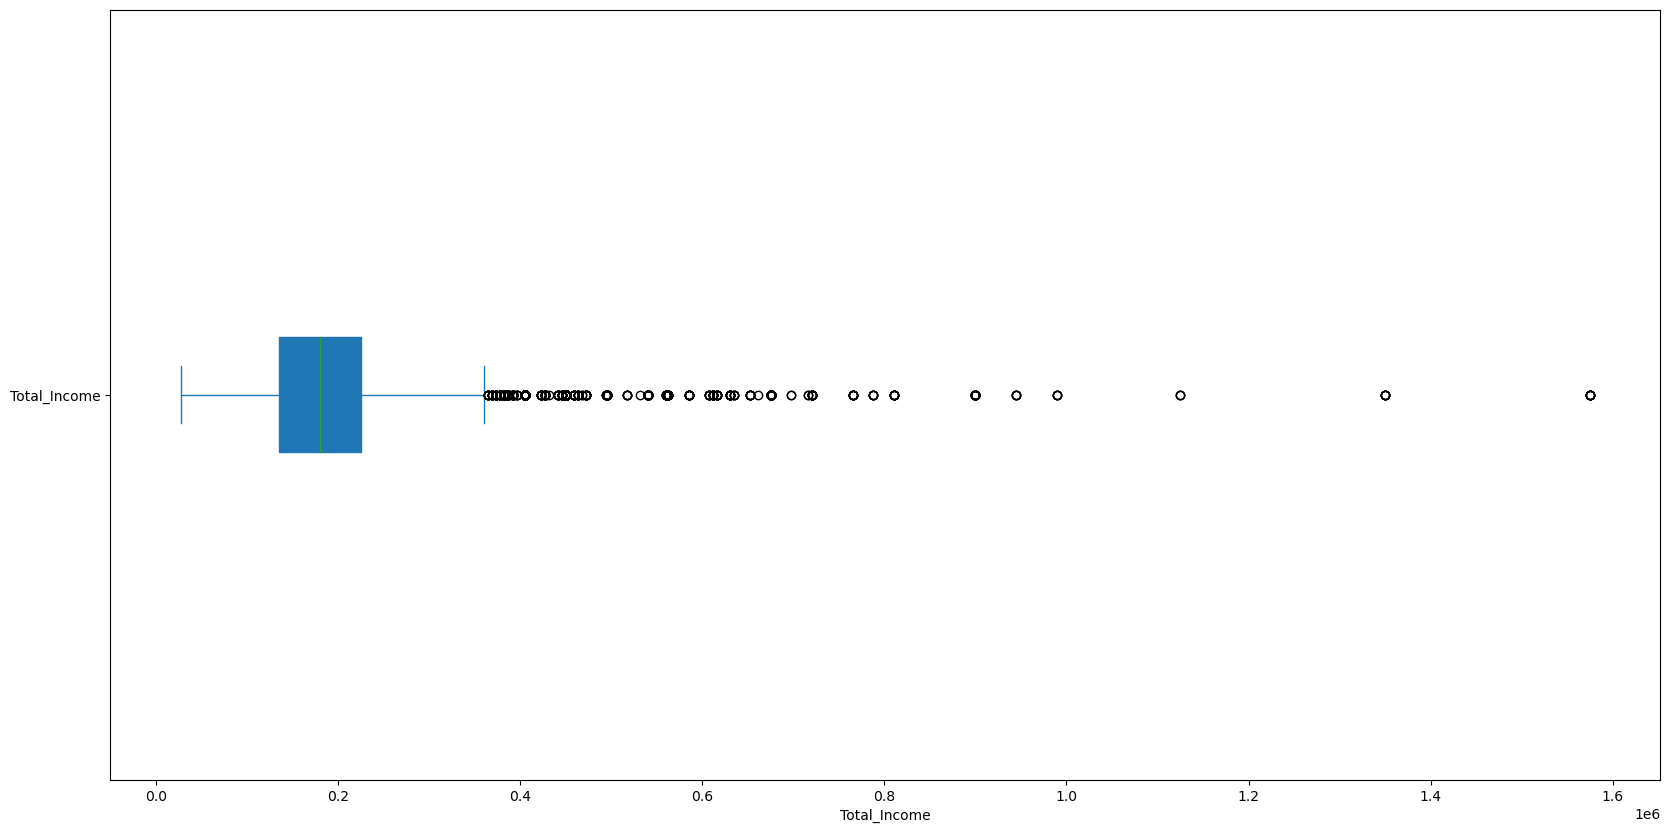

left limit:0.0
right limit:360000.0
iqr:90000.0


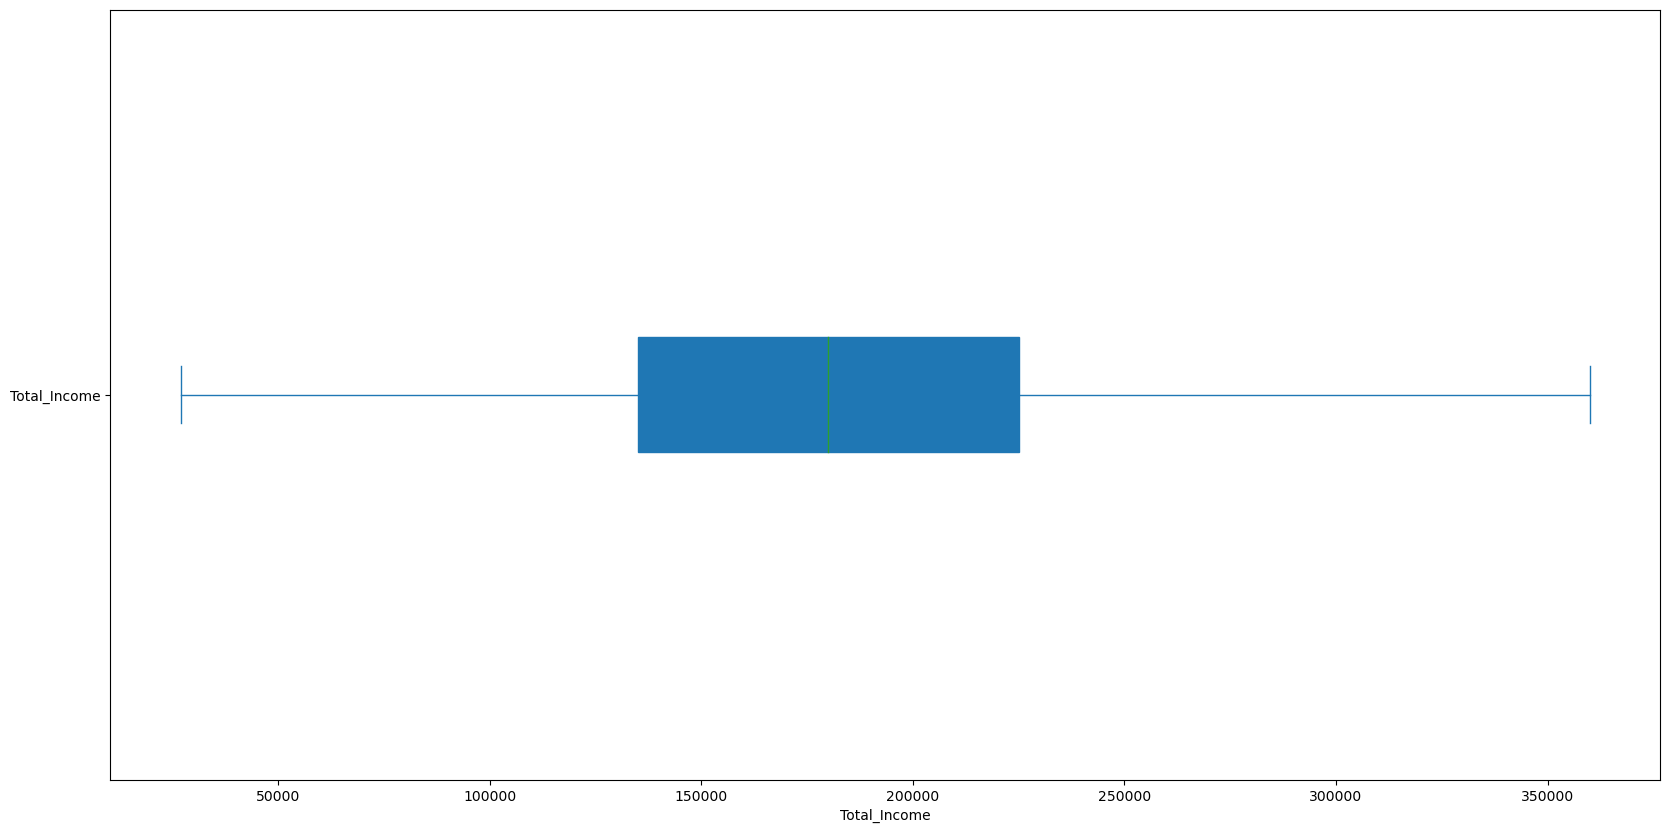

Total_Bad_Debt:


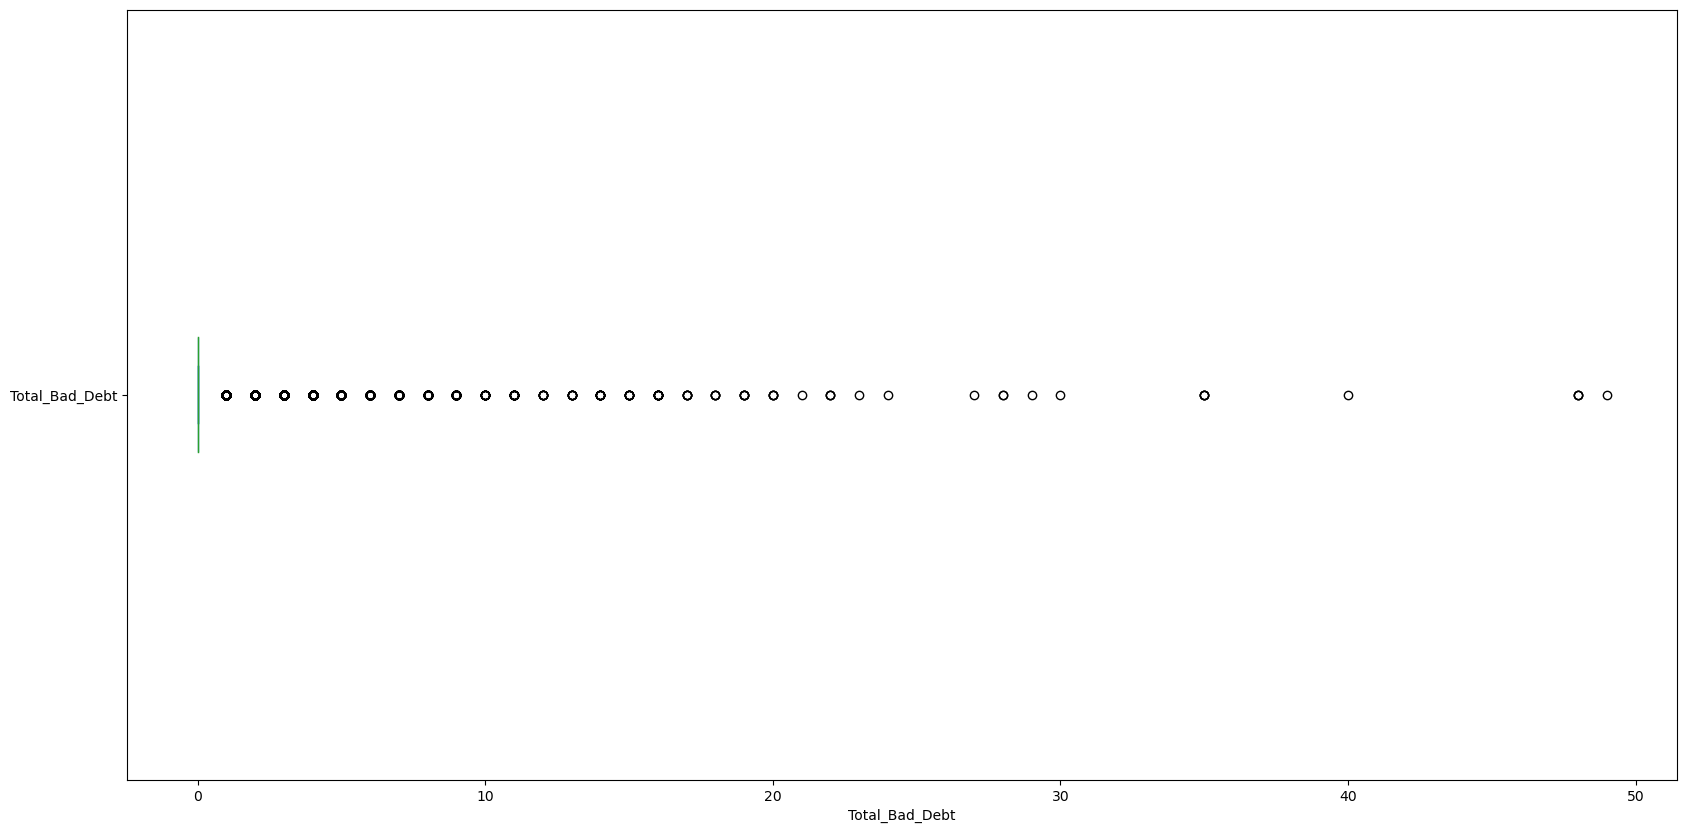

left limit:0.0
right limit:0.0
iqr:0.0


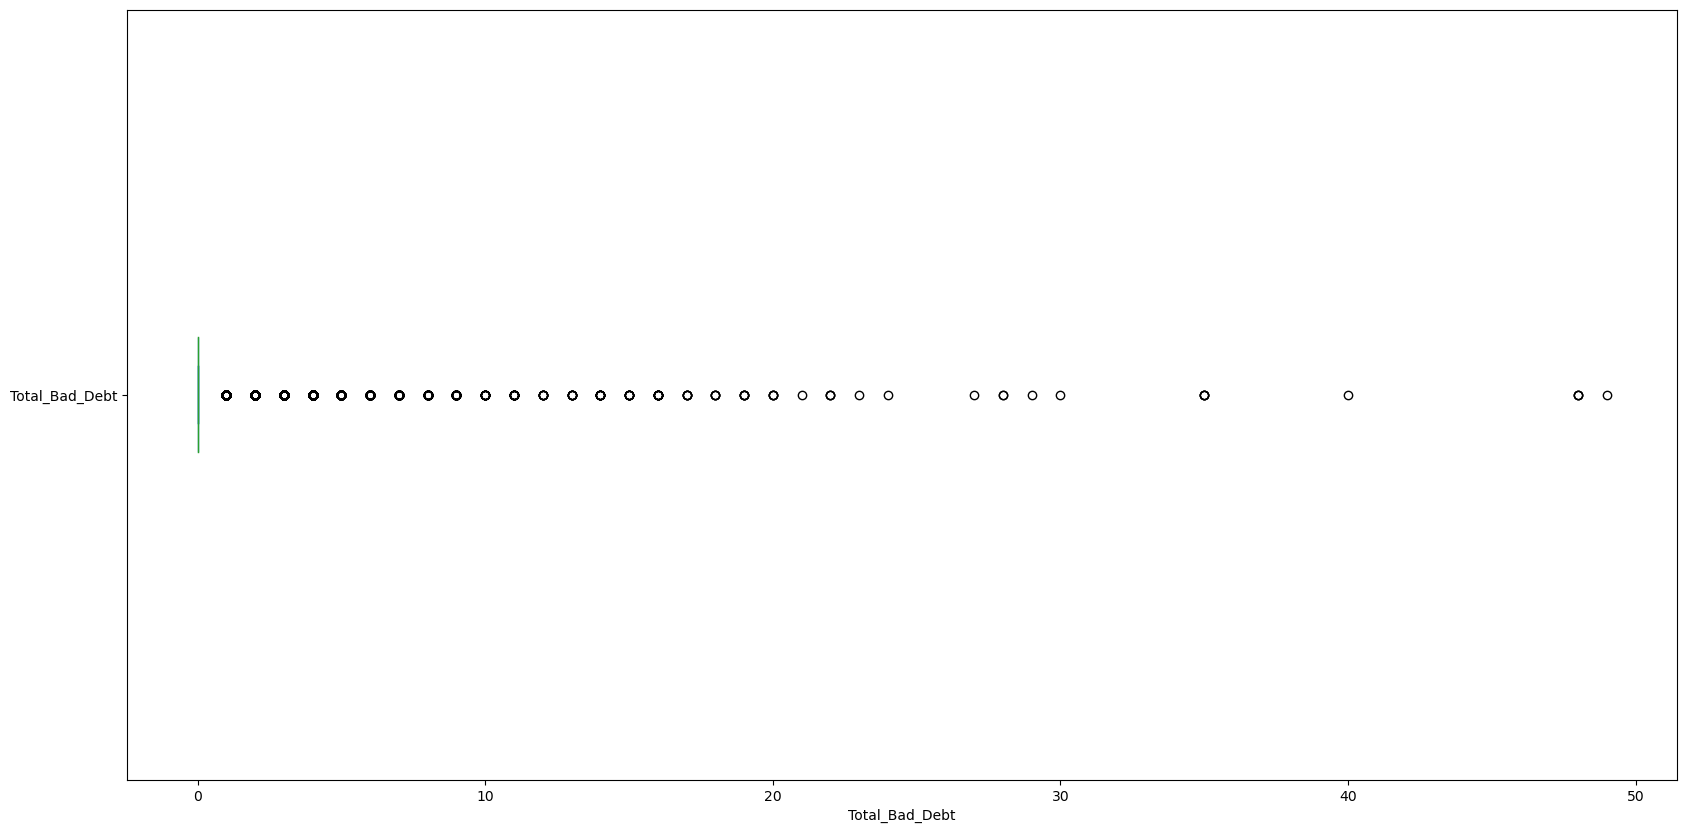

Years_of_Working:


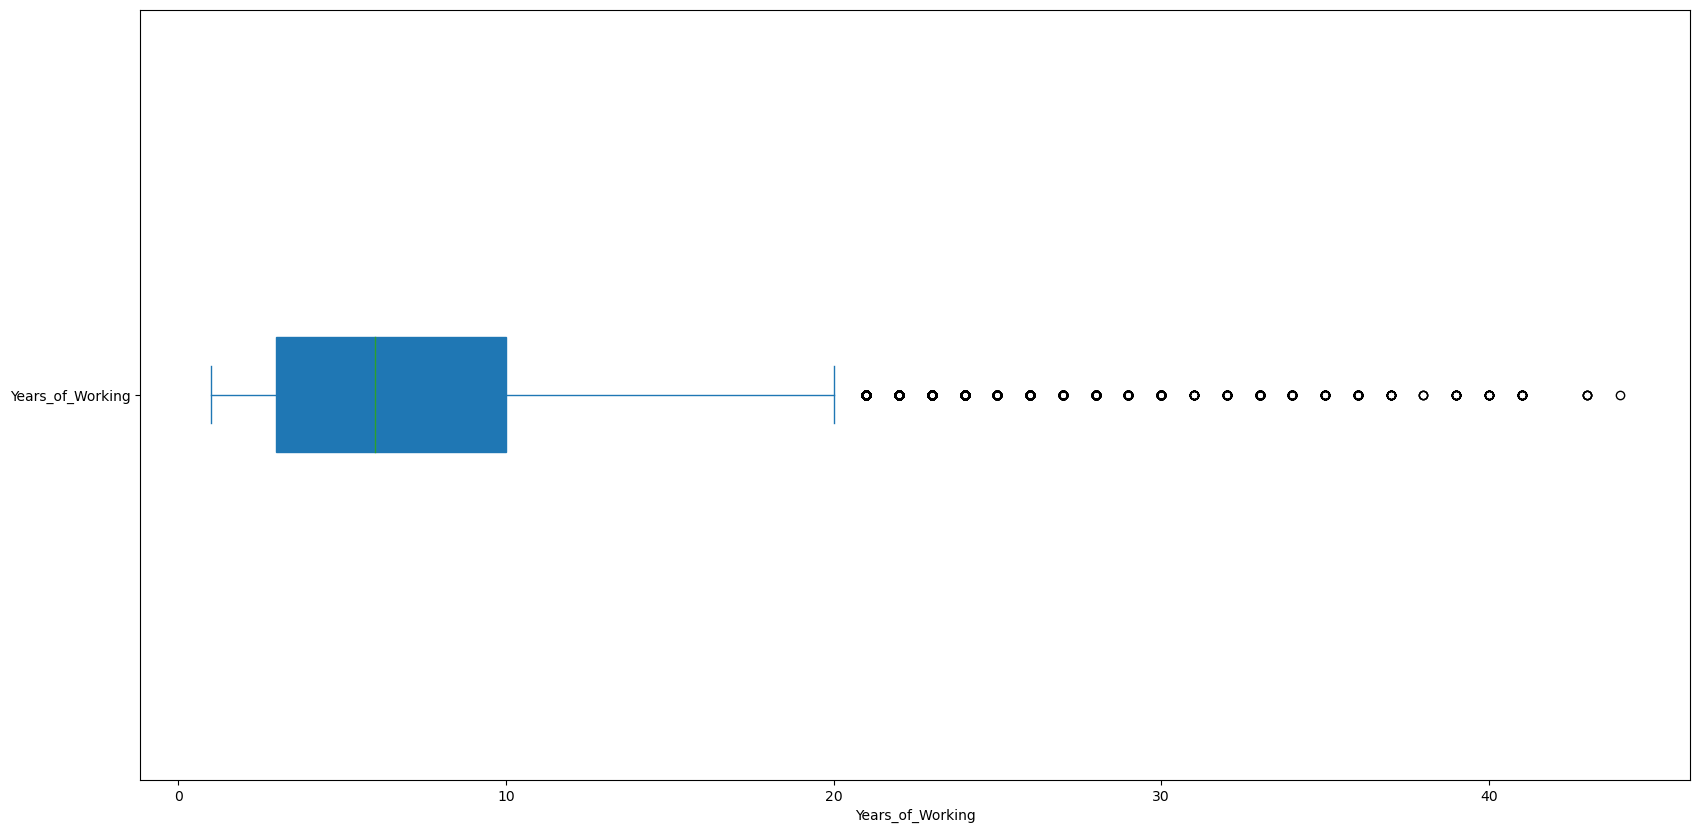

left limit:-7.5
right limit:20.5
iqr:7.0


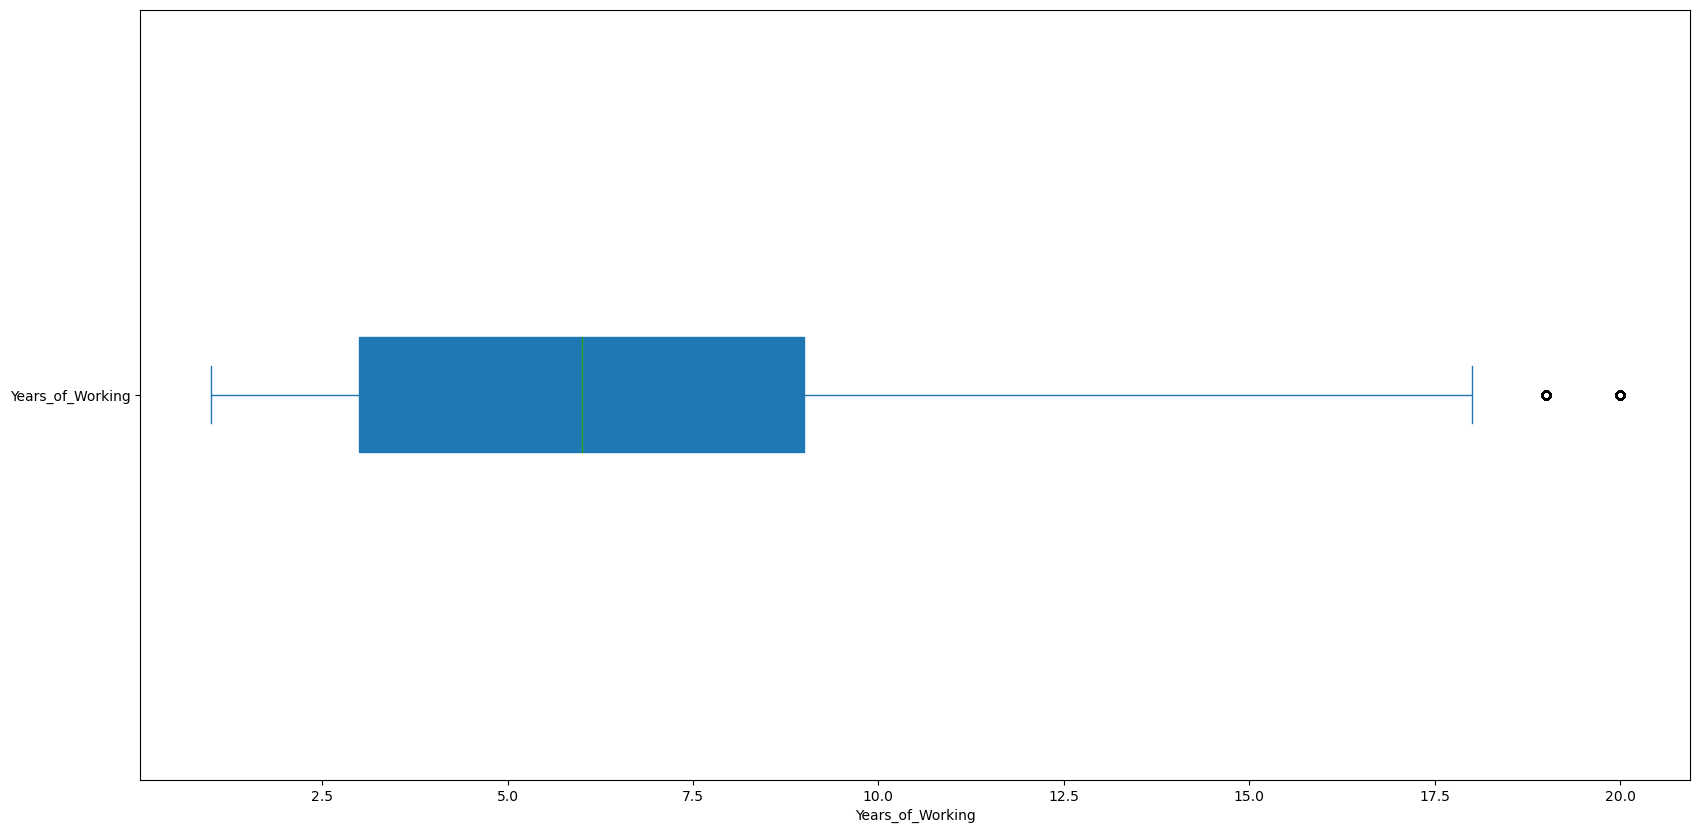

In [44]:
for i in continious:
    print(i+":")
    plt.figure(figsize=(20,10))
    df[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()
    
    iqr= df[i].describe()['75%']-df[i].describe()['25%']
    right_lim=df[i].quantile(0.75)+1.5*iqr
    leftt_lim=df[i].quantile(0.25)-1.5*iqr
    print("left limit:{}".format(leftt_lim))
    print("right limit:{}".format(right_lim))
    print("iqr:{}".format(iqr))

    a=input("si hay outliers a la izquierda, escriba 'left', a la derecha, escriba 'right', en ambos, escriba 'both', si no hay outliers, escriba 'no'")
    a=a.lower()
    if a=='left':
        lo=float(input('con que numero se va a reemplazar'))
        df[i]=[lo if val<leftt_lim else val for val in df[i]]
    elif a=='right':
        ro=float(input('con que numero se va a reemplazar'))
        df[i]=[ro if val>right_lim else val for val in df[i]]
    elif a=='both':
        lo=float(input('con que numero se va a reemplazar'))
        ro=float(input('con que numero se va a reemplazar'))
        df[i]=[ro if val>right_lim else val for val in df[i]]
        df[i]=[lo if val<leftt_lim else val for val in df[i]]
    elif a=='no':
        pass
    plt.figure(figsize=(20,10))
    df[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i,)
    plt.show()

Applicant_Age:


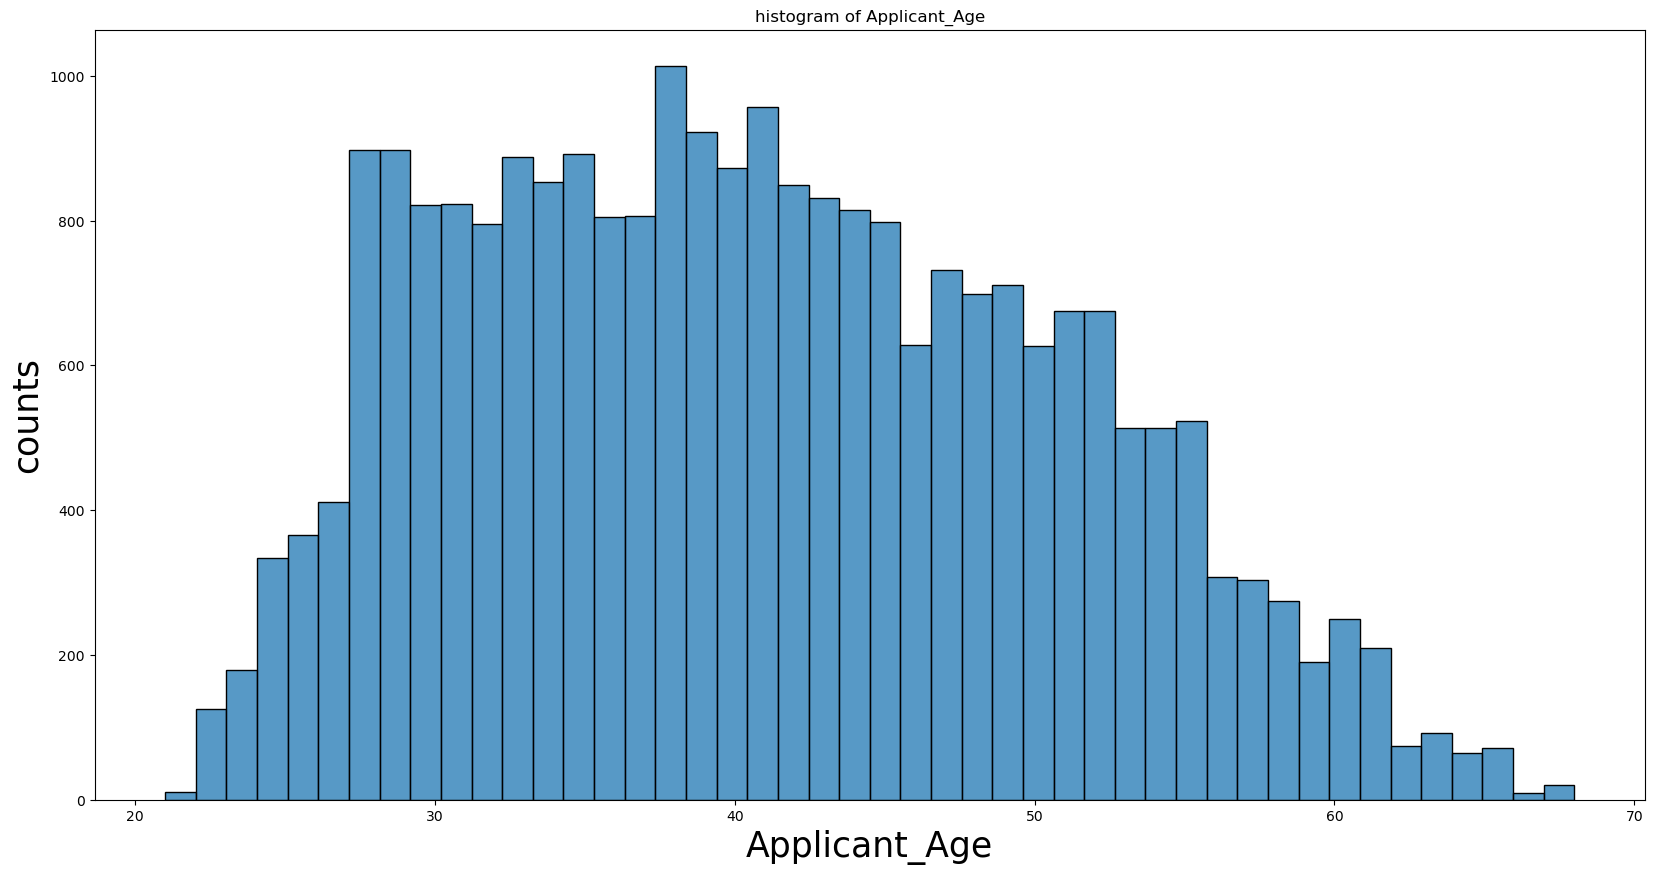

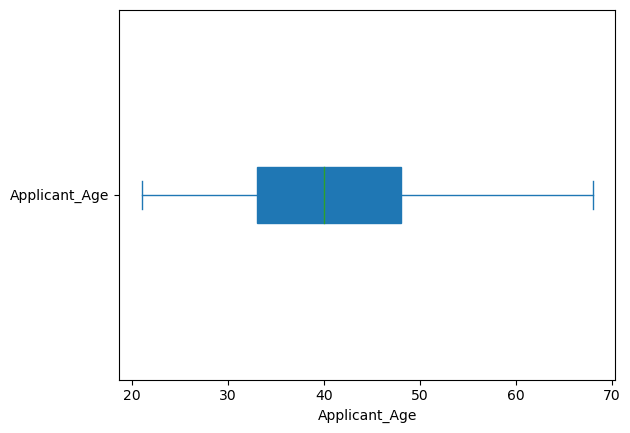

Total_Good_Debt:


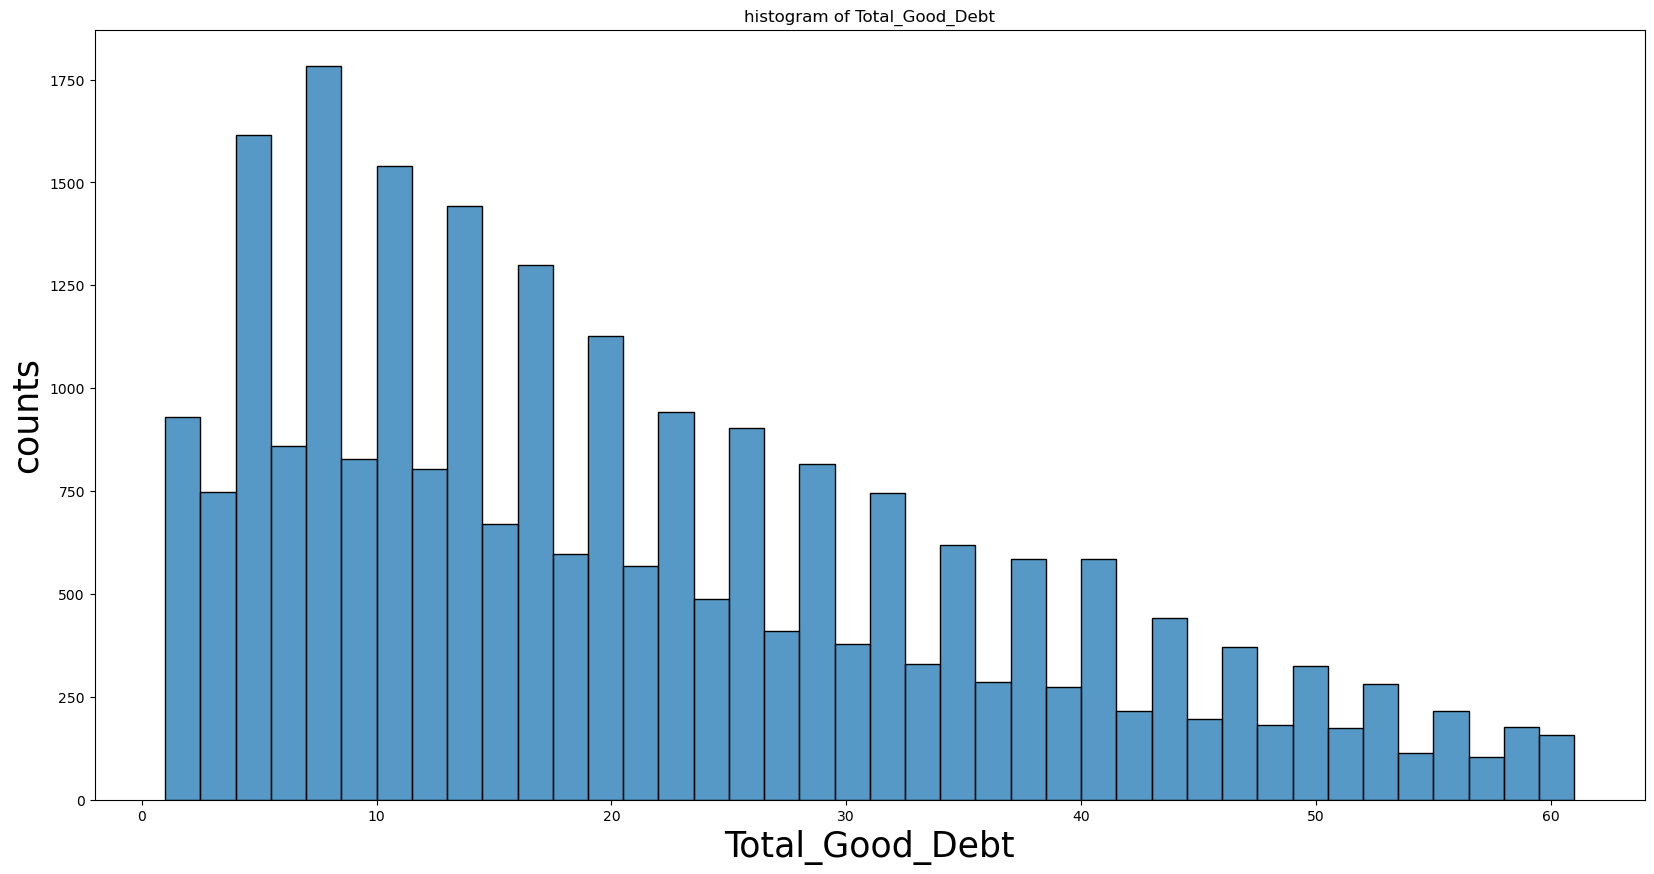

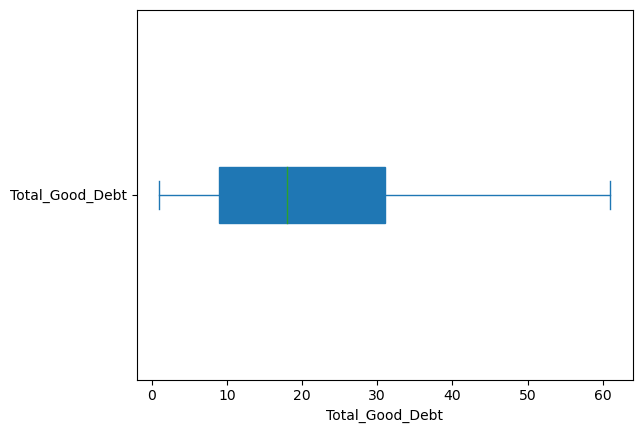

Total_Income:


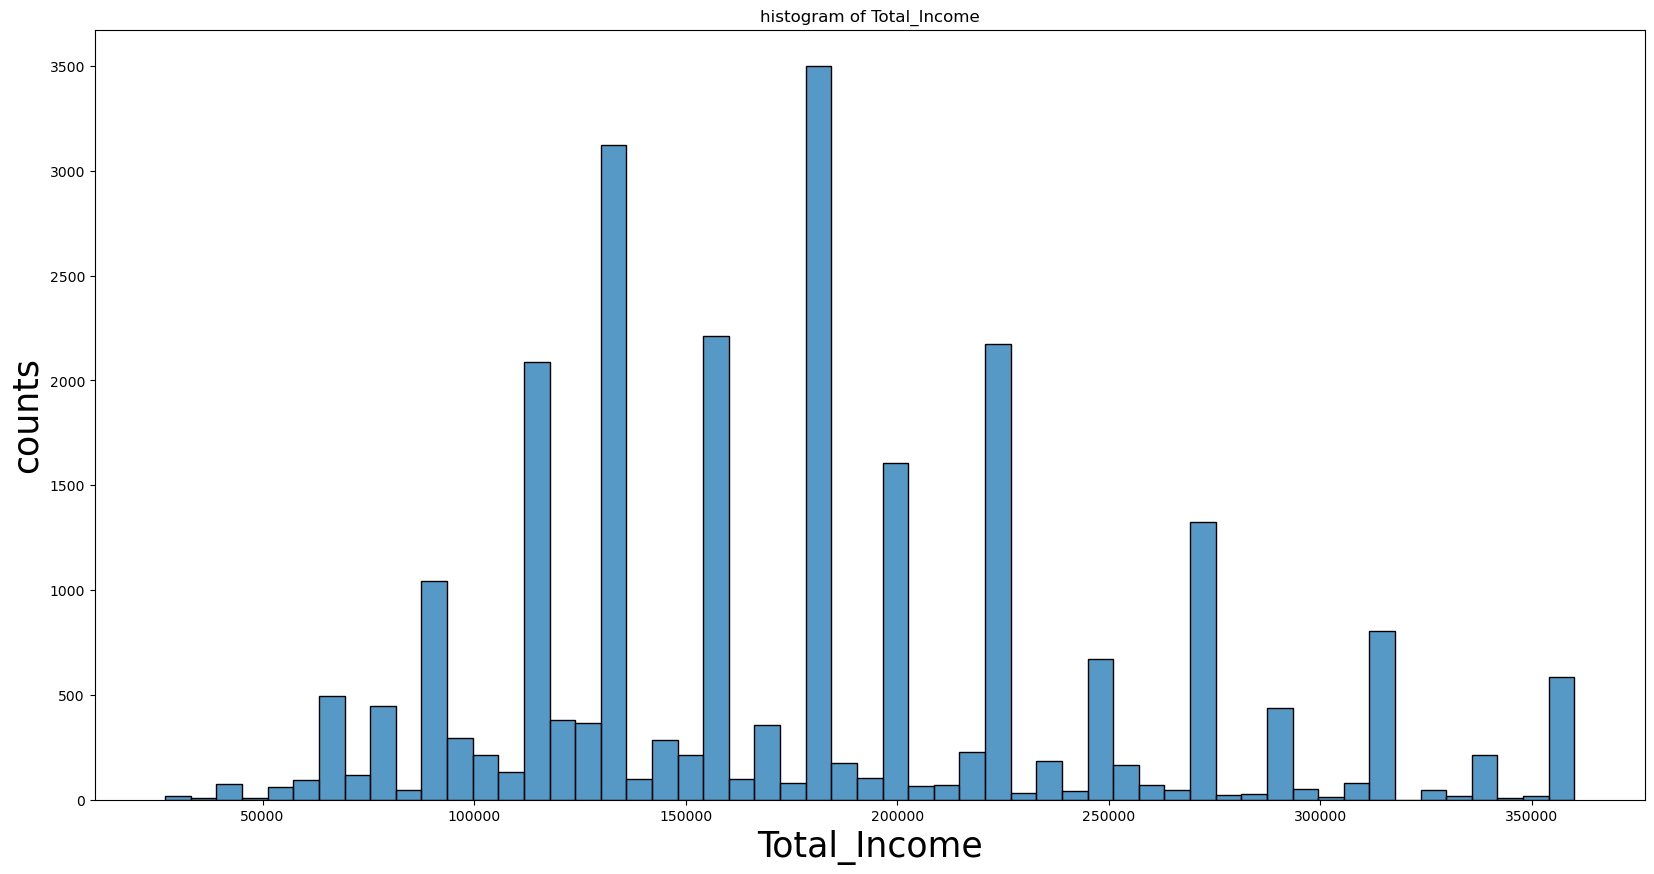

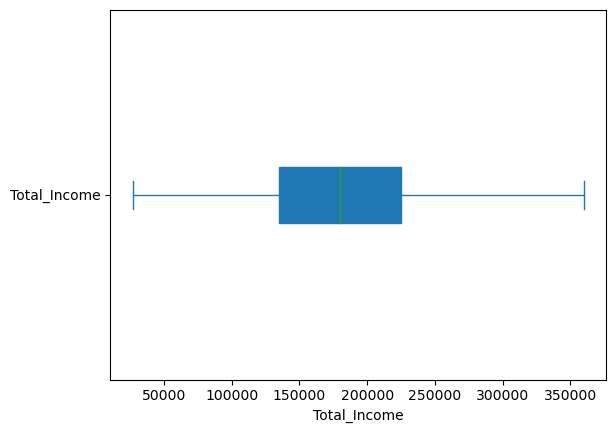

Total_Bad_Debt:


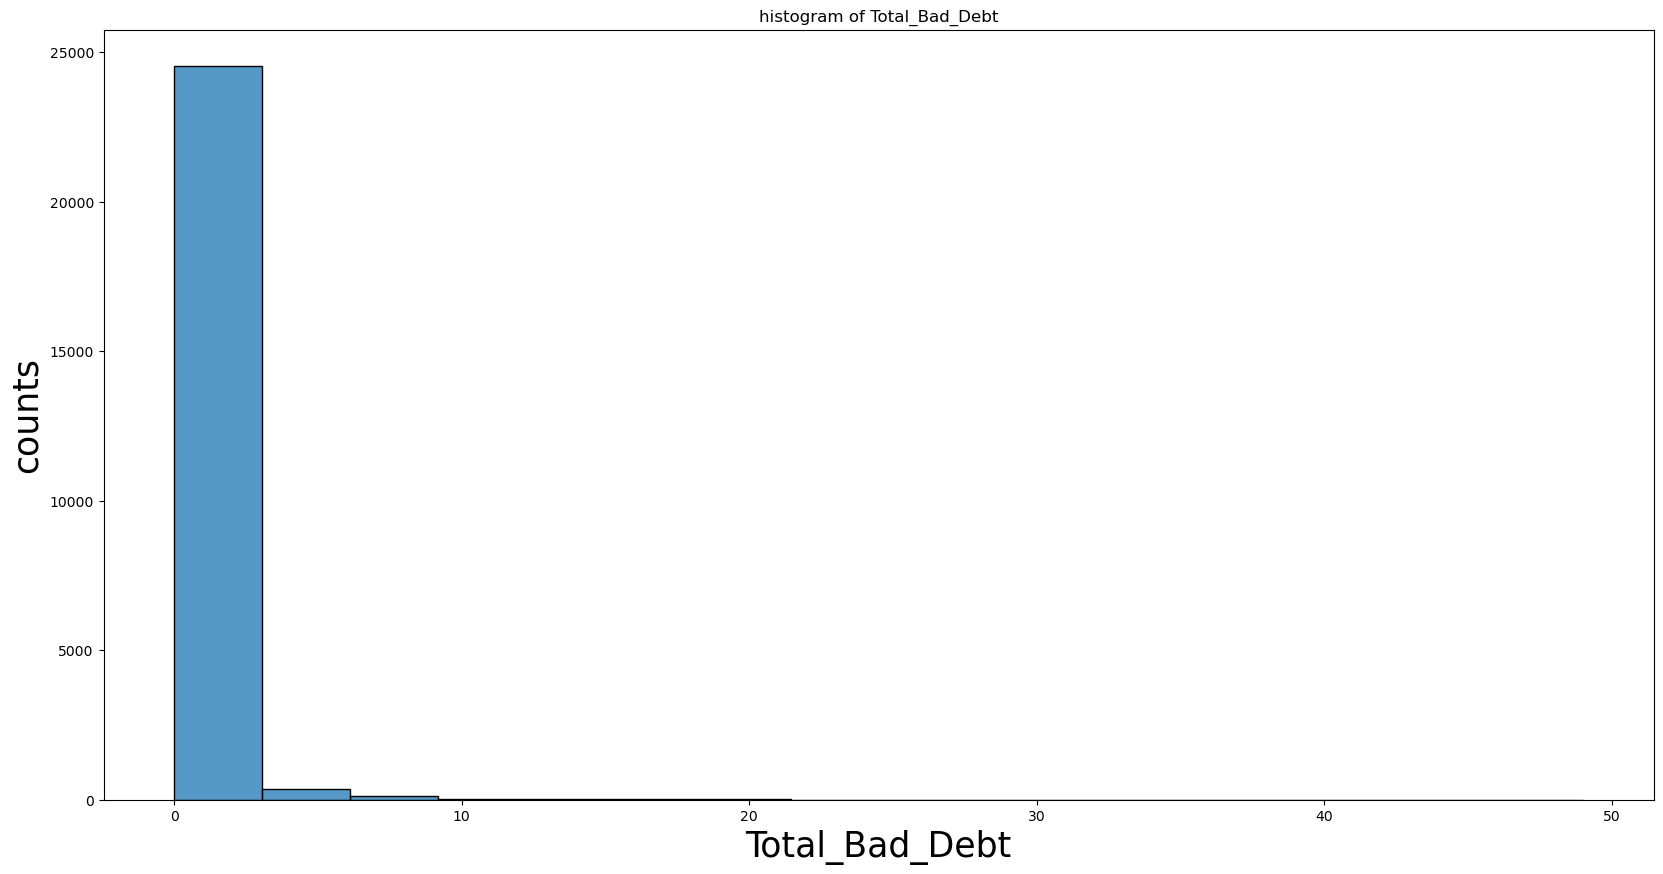

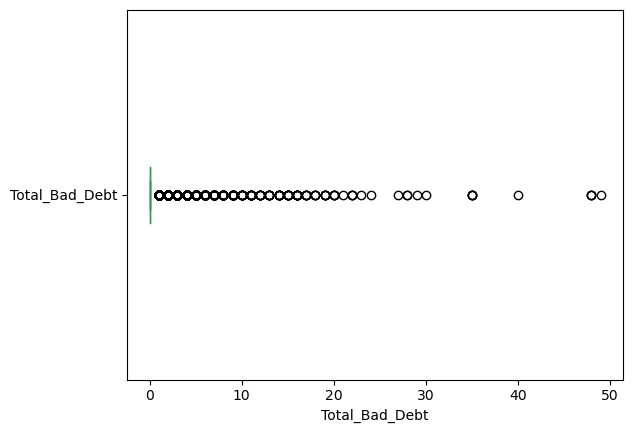

Years_of_Working:


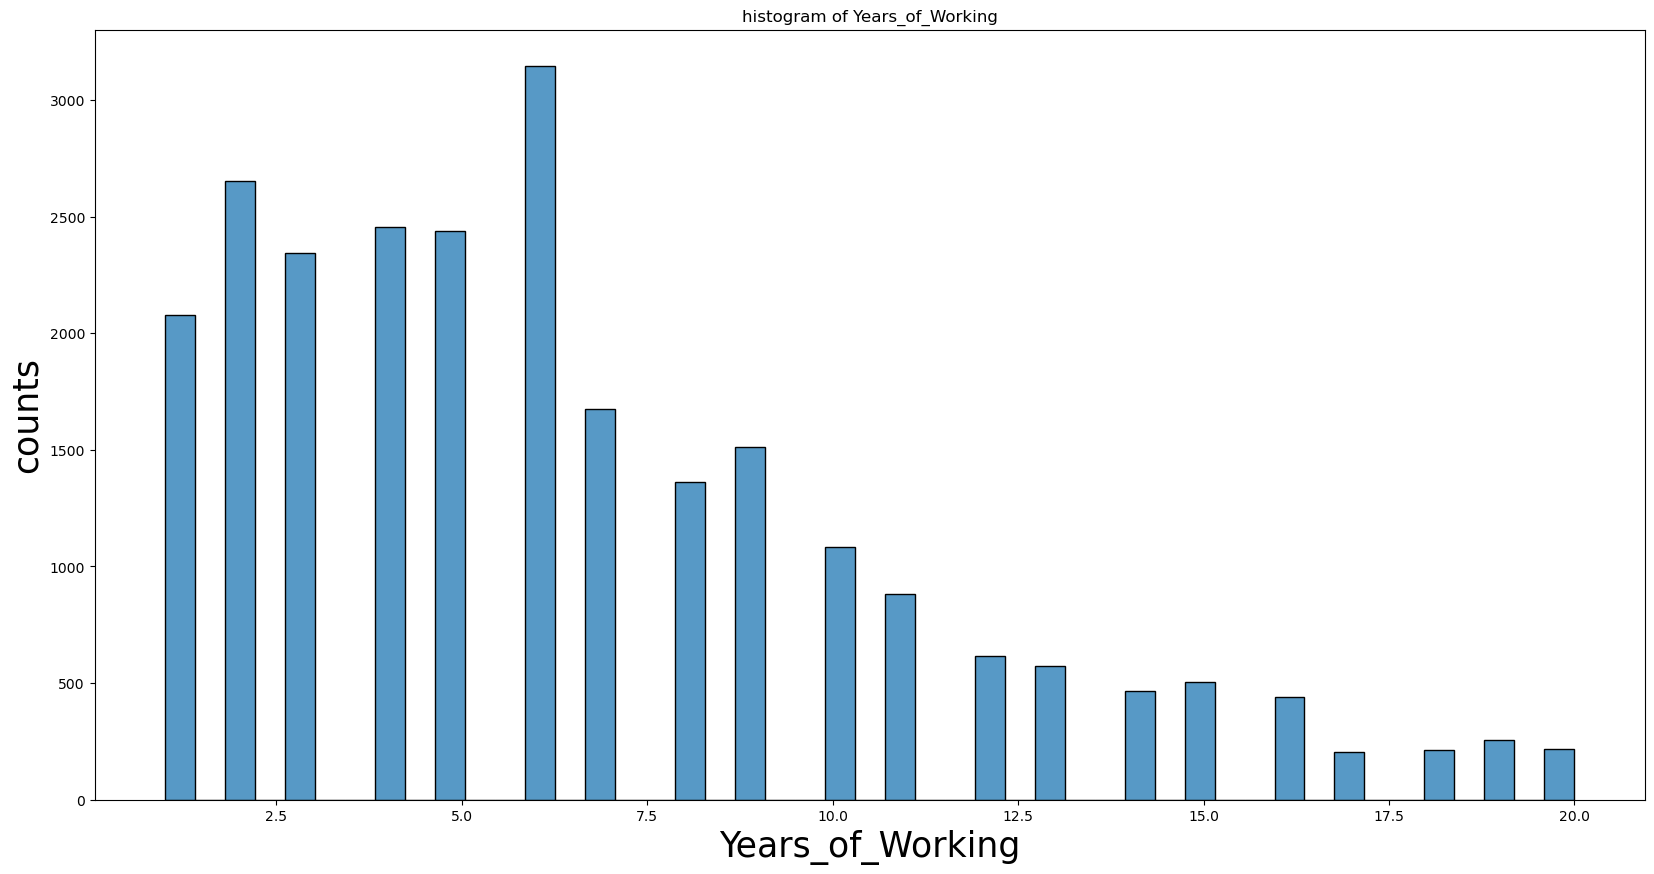

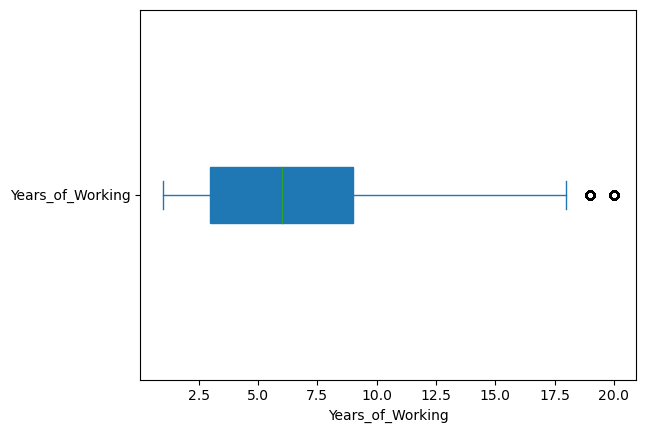

In [45]:
for i in continious:
    print(i+":")
    plt.figure(figsize=(20,10))
    sns.histplot(df[i])
    plt.xlabel(i, fontsize=25)
    plt.ylabel('counts', fontsize=25)
    plt.title('histogram of '+i)
    plt.show()
    df[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()

### Realizamos el modelo de clasificación:

En base al analisis anterior y a los p_values caluculados nos quedmos con las siguientes variables y analizaremos distintas combinaciones de ellas

- Gender
- Income Type
- Housing Type
- Job Title

### Overfitting & Underfitting

Utilizando un modelo de clasificación estudiamos los casos de overfitting y underfitting y elegimos la cantidad de variables que mejor funcionan en nuestro modelo.

In [46]:
x0 = df.drop('Status', 1)
y0 = df['Status']

x0_train,x0_test,y0_train,y0_test = train_test_split(x0, y0, test_size=0.2, random_state=1)

In [47]:
# Instranciamos el modelo

modelo = RandomForestClassifier()

In [48]:
modelo.fit(x0_train,y0_train)

RandomForestClassifier()

In [49]:
y0_pred = modelo.predict(x0_train)

In [50]:
acc = accuracy_score(y0_train,y0_pred)

In [51]:
acc

1.0

Ahora usamos nuestros datos de testeo para ver como predice nuestro modelo

In [52]:
y0_pred_test = modelo.predict(x0_test)

In [53]:
accuracy_score(y0_test,y0_pred_test)

0.9978113808197374

### Forward Selection

In [54]:
# Sequential Forward Selection(sfs)

sfs = SFS(RandomForestClassifier(),
          k_features=4,
          scoring = 'accuracy',
          cv = 3)

In [55]:
x1 = df.drop( 'Status', 1)
y1 = df['Status']

x1_train,x1_test,y1_train,y1_test = train_test_split(x1, y1, test_size=0.2, random_state=1)

In [56]:
sfs.fit(x1_train,y1_train)

SequentialFeatureSelector(cv=3, estimator=RandomForestClassifier(),
                          k_features=(4, 4), scoring='accuracy')

In [57]:
sfs.k_feature_names_

('Owned_Car', 'Owned_Email', 'Total_Bad_Debt', 'Total_Good_Debt')

In [58]:
x = df.loc[:,['Owned_Car', 'Owned_Email','Total_Bad_Debt','Total_Good_Debt', 'Job_Title-encoded']]
y = df['Status']

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=1)

model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred_test=model.predict(x_test)
accuracy_score(y_pred_test,y_test)

0.9992041384799045

Pruebo ahora con las variables que antes mencionamos

In [59]:
x1 = df.loc[:,['Applicant_Gender-encoded', 'Income_Type-encoded','Housing_Type-encoded', 'Job_Title-encoded']]
y1 = df['Status']

x1_train,x1_test,y1_train,y1_test = train_test_split(x1, y1, test_size=0.2, random_state=1)

model = RandomForestClassifier()
model.fit(x1_train,y1_train)
y1_pred_test=model.predict(x1_test)
accuracy_score(y1_pred_test,y1_test)

0.9950258654994031

Como las variables que yo seleccione en base al análisis hecho anteriormente me dan un accuracy un poco peor que con las encontradas con el feature selection, me quedo con estas últimas.

### Métricas para clasificación

In [60]:
confusion = metrics.confusion_matrix( y_pred_test, y_test)
confusion.ravel()

array([  21,    0,    4, 5001])

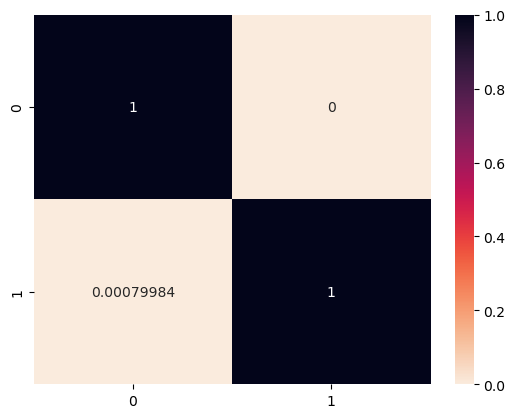

In [63]:
mc=confusion_matrix(y_pred_test,y_test)
mc_norm = mc / np.linalg.norm(mc, axis=1, keepdims=True)
sns.heatmap(pd.DataFrame(mc_norm), cmap=sns.cm.rocket_r, annot=True, fmt='.5g');

In [61]:
accuracy = metrics.accuracy_score(y_pred_test, y_test)
accuracy 

0.9992041384799045